# Is Soju really cannibalizing Beer?
(by Park, Pablo Chanwoo)

### EXECUTIVE SUMMARY
>- ff

### Project description

1. WB has come up with a hypothesis; **"Soju is cannibalizing beer sales".**  
2. Approve or reject the hypothesis using transaction data. (daily summary, 147 locations, for 6 months)


### Project approach

I would like to first define the hypothesis fisrt. By stating that "product A is being cannibalized", I can presume that **1) the sales volume in proportion should be decreasing, 2) product A and the one that is canibalizing should be moving towards negative correlation.** In order to test the hypothesis according to the definitions of cannibalization I understand, studying regression coefficients may seem like a rational approach, and I may also consider studying importance of features in determining demands for beer, while simple EDA may be enough to test hypothesis. On top of it, I may consider clustering data by types of bar, season, or any other features that reflects own characteristics of cluster itself, in order to develop this project further.

### Python libraries for the project

The following libraries will be used for this project:  
- **pandas/numpy**: for data manipulation and basic statistical study
- **seaborn/matplotlib**: for graphic visualization of findings
- **sklearn**: for descriptive analysis
- **re**: for filtering via column names

In [1]:
import pandas as pd

import seaborn as sns
#import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import re

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



C:\Programming\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

Populating the interactive namespace from numpy and matplotlib


## 1. EDA

> -

### Data exploration

- As given in instruction, the data is from 147 outlets over 6-month period.
- There are only 3 segments for bars `['Food,Spirits', 'Beer,Food', 'Food']`.
- There are zeroes, but no missing value.
- The data mainly consists of volume(units), revenue, count of oders.
- `Avg. Check Size`(Total Revenue / number of Check) and `Soju Price`(Soju Revenue / Soju Units) seem like derived variables

In [3]:
data = pd.read_excel("c:/testData.xlsx")
data.shape

(16635, 22)

In [4]:
data.head()

,Bar ID,Date,Bar Segmentation,Beer Draught Volume (L),Beer Packaged Volume (L),Total Volume (L),Total Revenue,Beer Revenue,Beer Units,Spirits Revenue,...,Non Alcoholic Revenue,Wine Revenue,Soju Revenue,Soju Units,# Beer Orders,# Beer & Food Orders,# Soju & Beer Orders,# Soju & Food Orders,Avg. Check Size,Soju Price
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,...,23500,0,54000,12,14,14,1,7,26881.818182,4500.0
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,...,24000,0,18000,4,7,7,1,2,46612.500000,4500.0
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,...,10000,0,27000,5,7,7,2,4,26140.909091,5625.0
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,...,4000,0,27000,5,12,12,2,4,34593.750000,5625.0
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,...,0,0,4500,1,7,7,1,1,28511.111111,4500.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16635 entries, 0 to 16634
Data columns (total 22 columns):
Bar ID                      16635 non-null object
Date                        16635 non-null datetime64[ns]
Bar Segmentation            16635 non-null object
Beer Draught Volume (L)     16635 non-null float64
Beer Packaged Volume (L)    16635 non-null float64
Total Volume (L)            16635 non-null float64
Total Revenue               16635 non-null int64
Beer Revenue                16635 non-null int64
Beer Units                  16635 non-null int64
Spirits Revenue             16635 non-null int64
Spirits Units               16635 non-null int64
Food Revenue                16635 non-null int64
Non Alcoholic Revenue       16635 non-null int64
Wine Revenue                16635 non-null int64
Soju Revenue                16635 non-null int64
Soju Units                  16635 non-null int64
# Beer Orders               16635 non-null int64
# Beer & Food Orders        16635 non-nul

In [6]:
pd.options.display.max_columns = None
# display all DataFrame columns to check with my own eyes

data.columns = ['barId', 'date', 'segment', 'draughtV', 'packagedV',
                'totalV', 'totalR', 'beerR', 'beerU', 'spiritsR',
                'spiritsU', 'foodR', 'nonAlcoholR', 'wineR', 'sojuR', 
                'sojuU', 'beerO', 'beerFoodO', 'sojuBeerO', 'sojuFoodO',
               'avgCheck', 'sojuP']
# change column names to index easily

In [7]:
data.head()

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,68,461100,23500,0,54000,12,14,14,1,7,26881.818182,4500.0
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,63,298300,24000,0,18000,4,7,7,1,2,46612.500000,4500.0
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,57,234100,10000,0,27000,5,7,7,2,4,26140.909091,5625.0
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,35,222500,4000,0,27000,5,12,12,2,4,34593.750000,5625.0
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,20,92100,0,0,4500,1,7,7,1,1,28511.111111,4500.0


In [8]:
data.tail()

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
16630,Bar 147,2017-12-27,Food,28.7,0.66,29.36,1204538,187728,54,83635,23,911358,21817,0,0,0,15,15,0,0,19119.650794,0.0
16631,Bar 147,2017-12-28,Food,43.8,1.65,45.45,1403450,291820,77,58180,16,1035270,18180,0,0,0,22,22,0,0,23007.377049,0.0
16632,Bar 147,2017-12-29,Food,50.9,2.64,53.54,1688716,352273,103,80000,22,1229627,26816,0,0,0,17,17,0,0,19867.247059,0.0
16633,Bar 147,2017-12-30,Food,44.9,1.98,46.88,1577712,309546,91,36360,10,1206445,25361,0,0,0,20,19,0,0,19008.578313,0.0
16634,Bar 147,2017-12-31,Food,37.2,7.92,45.12,2478161,318639,89,54545,15,2043801,61176,0,0,0,28,27,0,0,17329.797203,0.0


In [9]:
data.apply(lambda x: len(x.unique()))
# there are 3 bar segments only out of 147 bars

barId            147
date             184
segment            3
draughtV        4687
packagedV       2416
totalV          7489
totalR         10683
beerR           5395
beerU            474
spiritsR        2997
spiritsU         377
foodR           8772
nonAlcoholR     1738
wineR            353
sojuR           1509
sojuU            219
beerO            198
beerFoodO        188
sojuBeerO         56
sojuFoodO         89
avgCheck       14061
sojuP            252
dtype: int64

In [10]:
data.segment.unique()

array(['Food,Spirits', 'Beer,Food', 'Food'], dtype=object)

In [11]:
data.isna().sum()
# there are no missing values

barId          0
date           0
segment        0
draughtV       0
packagedV      0
totalV         0
totalR         0
beerR          0
beerU          0
spiritsR       0
spiritsU       0
foodR          0
nonAlcoholR    0
wineR          0
sojuR          0
sojuU          0
beerO          0
beerFoodO      0
sojuBeerO      0
sojuFoodO      0
avgCheck       0
sojuP          0
dtype: int64

### Descriptive Analysis

>- Over time, "Beer Units" sold are in a downward trend, but the sample size is too small to be considered stable during the early stage of observation.
- "Soju Units" do not seem to demonstrate upward demands.
- Looking at the correlation too, "Beer Units" and "Soju Units" show more and more positive relationship over time.
- The variables are in right-skewed distribution, and needs normalization before regression.
- The bars do not share similar characteristics (some may), and clustering/grouping may reveal unexplained insights.


*In most case, used Units instead of Revenue to explain demand, as Revenu is consequence to demands and is effected by many other factors (I.e. price, promotion)*

Text(0.5,1,'Sales trend by the type of beverage')

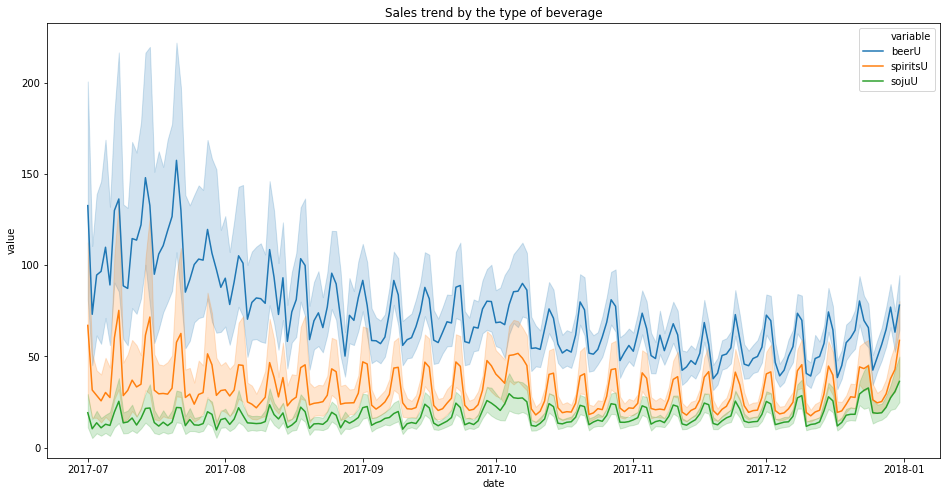

In [12]:
dataLong = data.melt(['barId', 'date', 'segment'])
# convert data into long format to easily visualize
sns.lineplot(data=dataLong[dataLong['variable'].isin(['sojuU', 'beerU', 'spiritsU'])], x = 'date', y='value', hue='variable')
plt.title("Sales trend by the type of beverage")

- It seems like there is a downward sales trend for beer, while soju and spirits remain constant.
- The variance of sales data is getting smaller towards the end of year. (It should be on the other way around in general cases)

In [13]:
tmp = data[['date', 'beerU']]
tmp['month'] = [d.month_name() for d in tmp['date']]
tmpA = tmp.groupby('month').mean()
tmpB = tmp.groupby('month').std()
tmp = pd.merge(tmpA, tmpB, left_index=True, right_index=True)
tmp.columns = ['mean', 'std']
tmp = tmp.iloc[[2,0,5,4,3,1],:]
tmp

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,mean,std
month,,
July,109.949657,127.784307
August,80.825762,95.144610
September,70.827905,75.716210
October,65.074388,71.730805
November,54.495392,58.723028
December,58.706543,62.453384


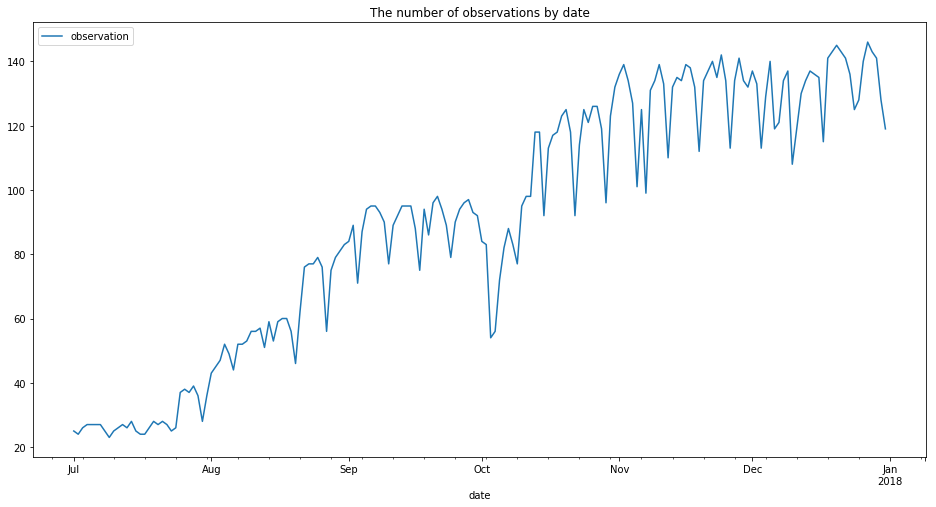

In [24]:
data.groupby('date', as_index=False)['barId'].count().plot(x='date', y = 'barId', kind='bar')
plt.title("The number of observations by date")
plt.legend(['observation'])

In [15]:
data.groupby('date', as_index=False)['barId'].count().sort_values('barId').head()

,date,barId
8,2017-07-09,23
1,2017-07-02,24
16,2017-07-17,24
15,2017-07-16,24
0,2017-07-01,25


- The high variance in the early date of data may have been effected by few observations.
- I can also note that the observations are not evenly available, and this may lead to biased result.(only 23 observations available for the 9th July)

In [16]:
data.groupby('barId', as_index=False)['date'].count().sort_values('date', ascending=False).head(10)

,barId,date
70,Bar 3,184
59,Bar 2,184
55,Bar 16,181
76,Bar 35,181
54,Bar 15,180
1,Bar 10,180
114,Bar 7,180
34,Bar 13,180
92,Bar 5,180
58,Bar 19,179


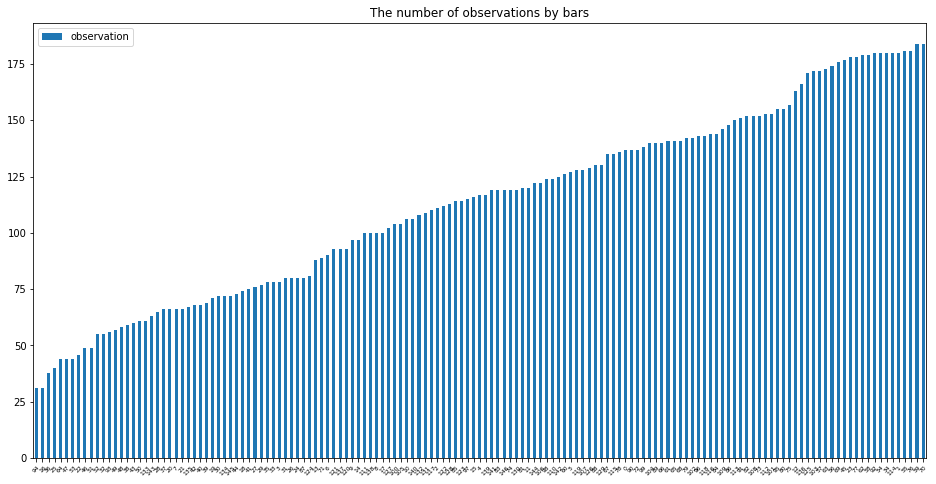

In [27]:
data.groupby('barId', as_index=False)['date'].count().sort_values('date', ascending=True).plot(kind='bar')
plt.rc
plt.xticks(rotation=45, size = 6)
plt.title('The number of observations by bars')
plt.legend(['observation'])

Text(0.5,0.98,'The sales of beverages in Bars with full observations')

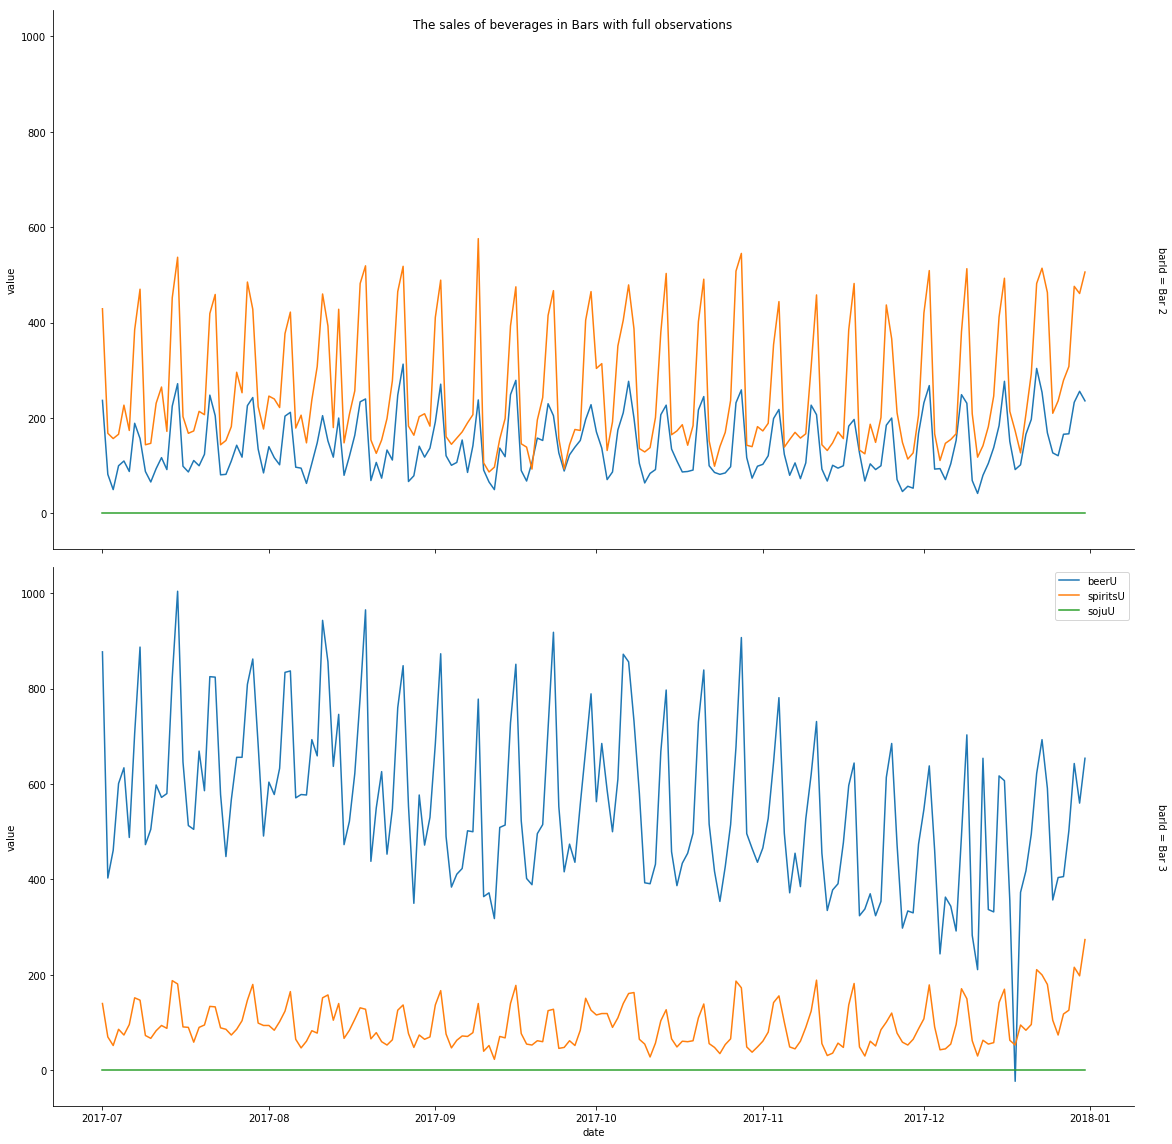

In [28]:
tmp = dataLong[dataLong['variable'].isin(['sojuU', 'beerU', 'spiritsU'])]
tmp = tmp[tmp.barId.isin(['Bar 3', 'Bar 2'])]
sns.FacetGrid(data=tmp, row = 'barId', hue = 'variable', height=8, aspect = 2, margin_titles=True).map(sns.lineplot,'date', 'value')
plt.legend()
plt.suptitle("The sales of beverages in Bars with full observations")

- There are two(2) bars with full data over the observed period.
- Both bars do not seem to sell soju. (unless spirits contains soju-likes.)
- It is difficult to state that the sales trend, for any kinds, is increasing/decreasing.
___

Text(0.5,1,'Correlation matrix for all variables')

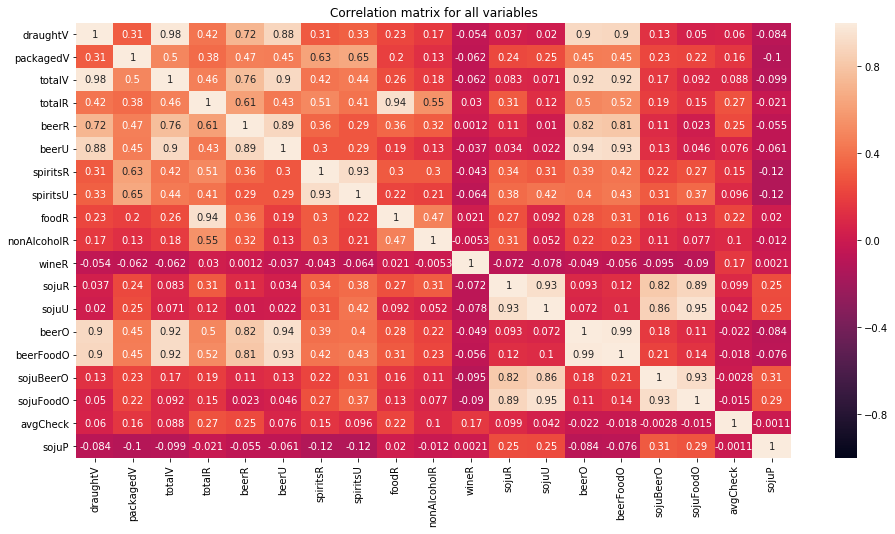

In [29]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation matrix for all variables')

- Obviously volume/units are highly correlated against revenue
- To test cannibalization, units refelect demands while revenue may mislead demands (i.e. promotion in beers may end up with more units sold, but less in revenue)
- Should be careful with the variable selection on regression

In [30]:
reCompile = re.compile('R$')
tmp = [not bool(reCompile.search(column)) for column in data.columns]

Text(0.5,1,'correlation matrix without revenue variables')

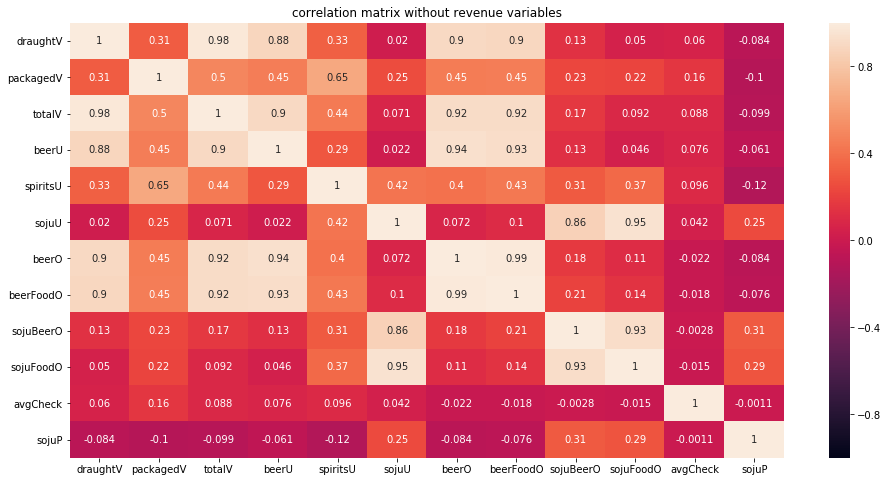

In [31]:
sns.heatmap(data.loc[:,tmp].corr(), vmin=-1, vmax=1, annot=True)
plt.title('correlation matrix without revenue variables')

In [32]:
data[['beerO', 'beerFoodO']].head()

,beerO,beerFoodO
0,14,14
1,7,7
2,7,7
3,12,12
4,7,7


- My interests is largely with variable "Beer Units", and from the correlation matrix it seems there is no relationship betwen "Soju Units" and "Beer Units". (0.022)
- On the other hand, what had caught my attention from correlation table are:
> 1. "Beer Draught Volume(L)" is more determinantal to "Total Volume(L)" of beer from given sample bars.
> 2. "# Beer Orders" and "# Beer & Food Orders" are highly correlated, and also very much correlated with "Beer Units": They almost never orders beer withou food.

In [33]:
data['month'] = [day.month_name() for day in data.date]
# added month as a categorical feature

Text(0.5,1.05,'The difference in correlation from July to December')

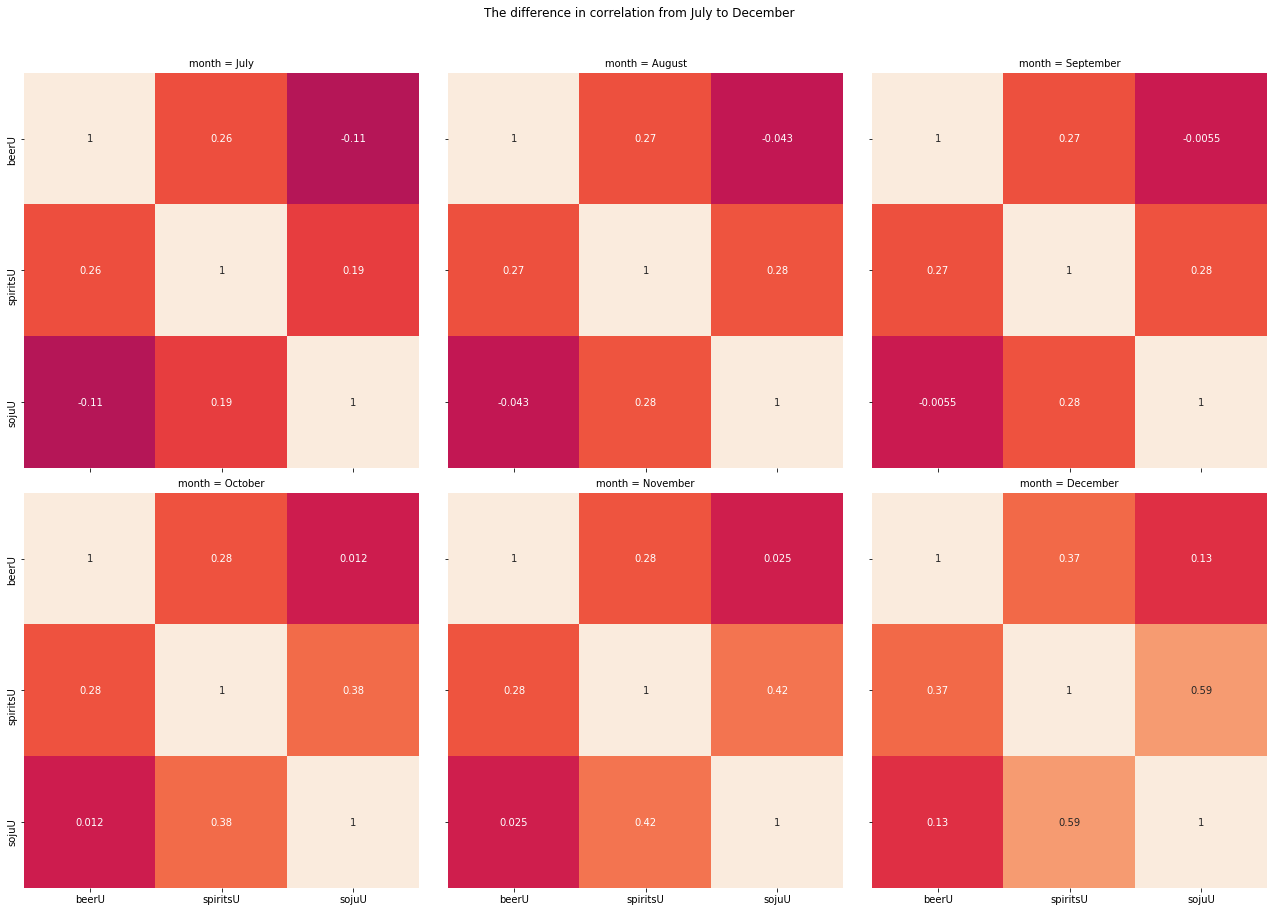

In [34]:
g = sns.FacetGrid(data[['beerU', 'spiritsU', 'sojuU', 'month']], col = 'month', height=6, col_wrap=3)
g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, cbar=False))
plt.suptitle('The difference in correlation from July to December', y = 1.05)

- Comparing correlation for sales volume in July and December, I see that both Soju and Spirits are more positively correlated in December than in July.
- In fact, the correlation is consistantly moving towards positive between Soju and Beer.
___

Text(0.5,1.05,'The distribution of values in variables')

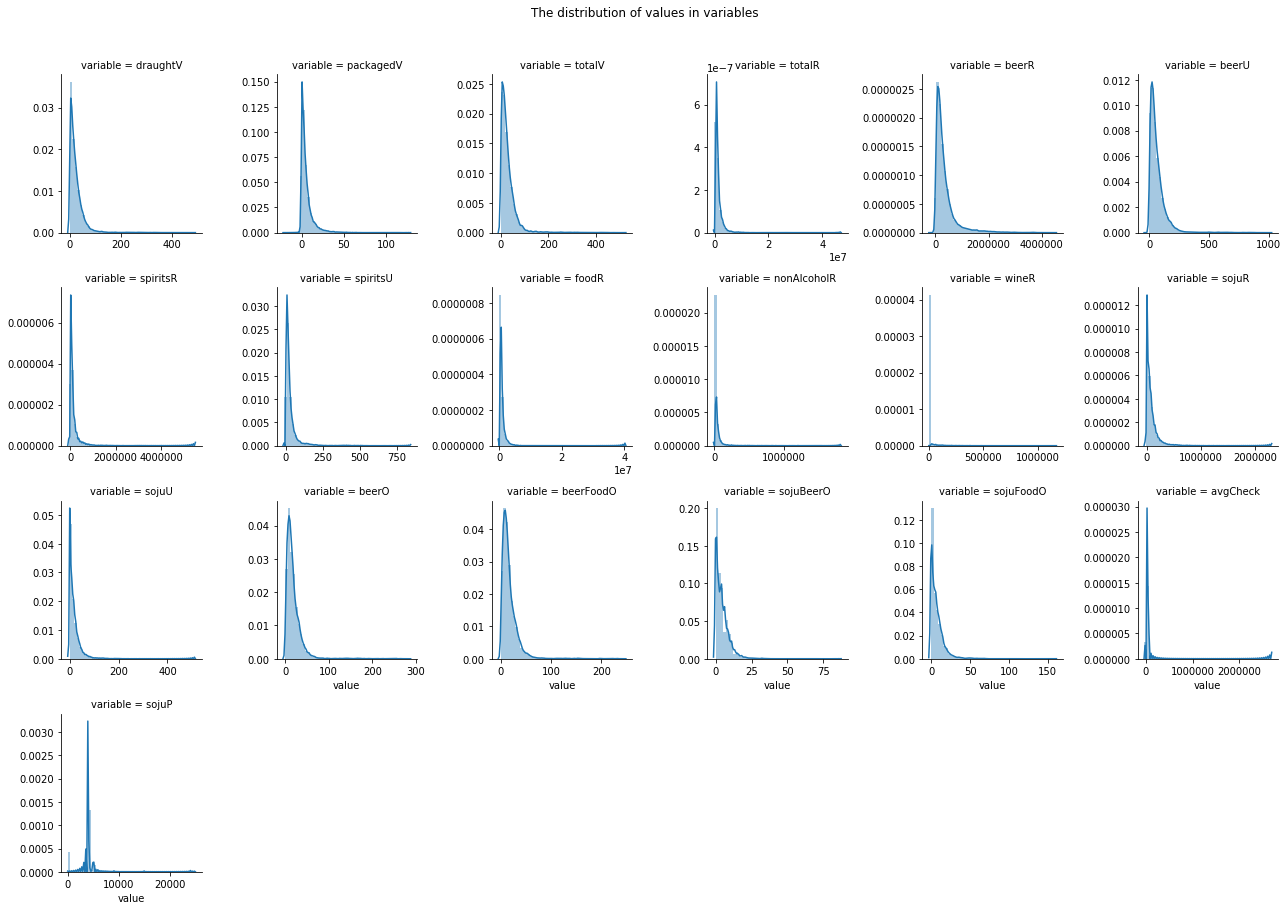

In [36]:
g = sns.FacetGrid(data=dataLong, col = 'variable', col_wrap = 6, sharey=False, sharex=False)
g.map(sns.distplot, 'value')
plt.suptitle("The distribution of values in variables", y = 1.05)

- All the variables are right-skewed, and the variables may need to be normalized before fitted to the model.

In [25]:
log(data.sojuU+e**(-5))

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


0        2.485468
1        1.387977
2        1.610785
3        1.610785
4        0.006715
5        1.387977
6        1.946872
7        0.006715
8        2.485468
9        1.946872
10       0.696510
11       1.610785
12       1.387977
13       0.696510
14      -5.000000
15       0.696510
16       1.100856
17       1.610785
18       2.080283
19       1.610785
20       1.387977
21       0.696510
22       0.696510
23       0.696510
24       0.006715
25       2.080283
26       1.946872
27       1.946872
28       1.946872
29       1.100856
           ...   
16605   -5.000000
16606   -5.000000
16607   -5.000000
16608   -5.000000
16609   -5.000000
16610   -5.000000
16611   -5.000000
16612   -5.000000
16613   -5.000000
16614   -5.000000
16615   -5.000000
16616   -5.000000
16617   -5.000000
16618   -5.000000
16619   -5.000000
16620   -5.000000
16621   -5.000000
16622   -5.000000
16623   -5.000000
16624   -5.000000
16625   -5.000000
16626   -5.000000
16627   -5.000000
16628   -5.000000
16629   -5

In [26]:
data.sojuU.unique()

array([ 12,   4,   5,   1,   7,   2,   0,   3,   8,  14,   9,  15,  10,
        11,   6,  13,  16,  49,  91, 139,  21,  33, 105, 104,  41,  64,
       118, 125,  47, 109,  86, 334, 400,  24, 219, 342, 318,  18,  94,
       130,  68, 286, 360, 238, 140,  66, 116, 222, 304, 420,  27,  19,
        23,  37,  22,  31,  26,  56,  32,  20,  17,  40,  29,  35,  34,
        25,  59,  36,  43,  38,  42,  39,  57,  28,  52,  60,  54,  62,
        48,  46,  30,  55,  69,  50,  44,  53,  45,  67,  65,  88,  81,
       131, 115,  92,  79,  71,  72,  83,  77,  63,  82, 101,  73, 111,
        70,  80,  98,  51,  78,  74, 122, 113, 151, 123, 119, 148, 124,
        89, 121,  58,  84, 117,  93,  75,  90, 110, 106, 108, 128,  95,
       192, 135, 152, 107, 142,  96, 216, 181,  87, 185, 102, 136, 157,
       133, 156, 154, 176,  97, 190, 184, 182, 196,  99, 149, 144, 201,
       163, 266, 202, 197, 274,  85,  76, 464, 230, 298, 177, 183, 146,
       138, 194, 186, 134, 172, 161, 103, 199, 198, 242, 173, 20

- There are impossible values in Soju Units (-1), which needs to be fixed.
- Should I log-scale after pre-processing, it would return variables in distribution look similar to below for regression:

Text(0.5, 1.0, 'approximate distribution of log(Soju Units)')

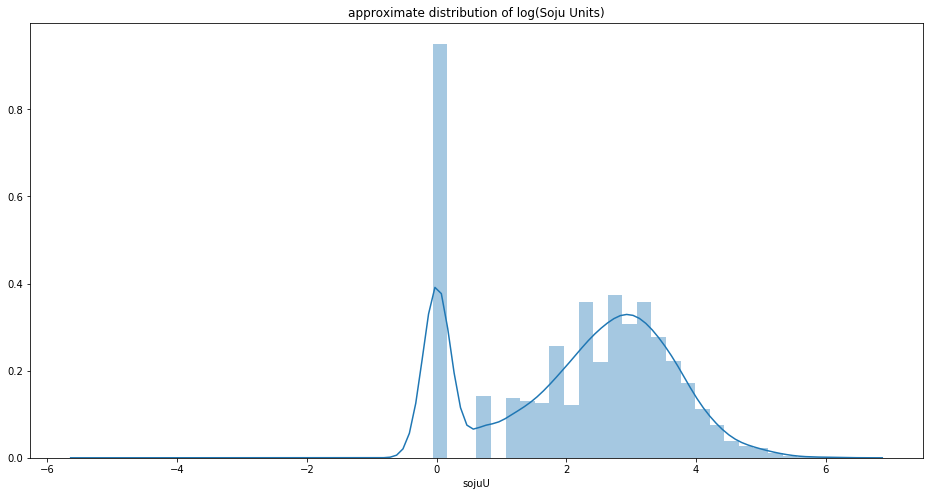

In [27]:
sns.distplot(log(data.sojuU+1+e**(-5)))
plt.title('approximate distribution of log(Soju Units)')

___


In [28]:
tmp = data.groupby('barId')[['beerU', 'spiritsU']].mean()
tmp['beerPct'] = tmp.apply(lambda x: round(x[0]/sum(x),2), axis=1)
tmp.beerPct.describe()

count    147.000000
mean       0.697755
std        0.203974
min        0.240000
25%        0.590000
50%        0.780000
75%        0.840000
max        1.010000
Name: beerPct, dtype: float64

Text(0.5, 1.0, 'The proportion of beer sold to beer+spirits')

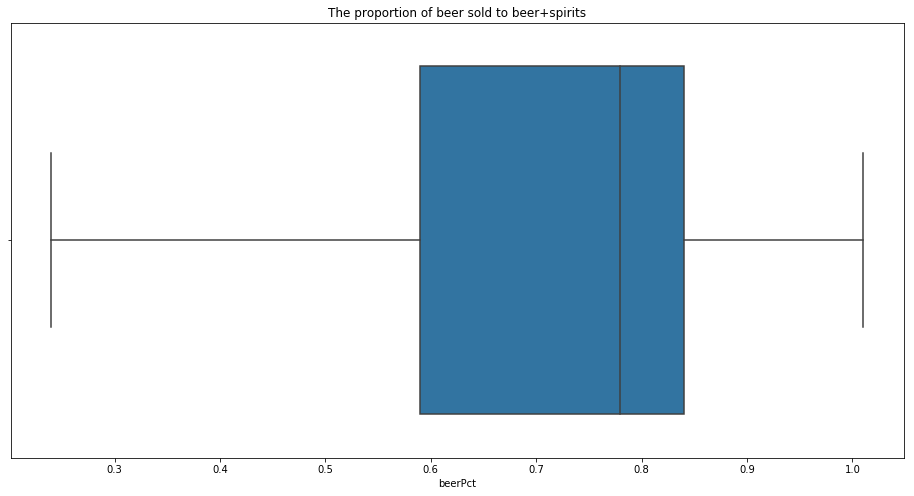

In [29]:
sns.boxplot(tmp.beerPct)
plt.title("The proportion of beer sold to beer+spirits")

Text(0.5, 1.0, 'The proportion of beer sold to beer+spirits by bar')

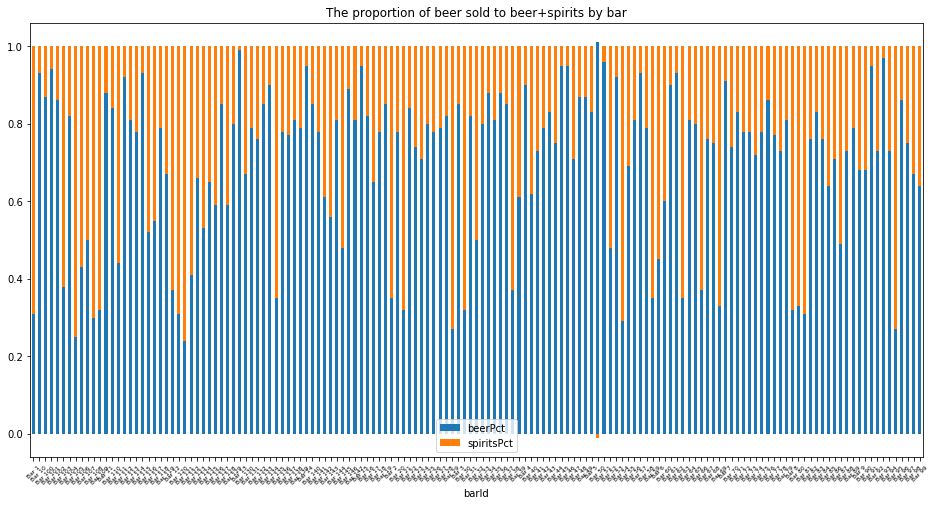

In [30]:
tmp['spiritsPct'] = 1-tmp.beerPct
tmp = tmp.drop(['beerU', 'spiritsU'], axis=1)
tmp.plot(kind='bar', stacked=True)
plt.xticks(rotation=45, size = 6)
plt.title('The proportion of beer sold to beer+spirits by bar')

Text(0.5, 1.0, 'The average units sold per bar')

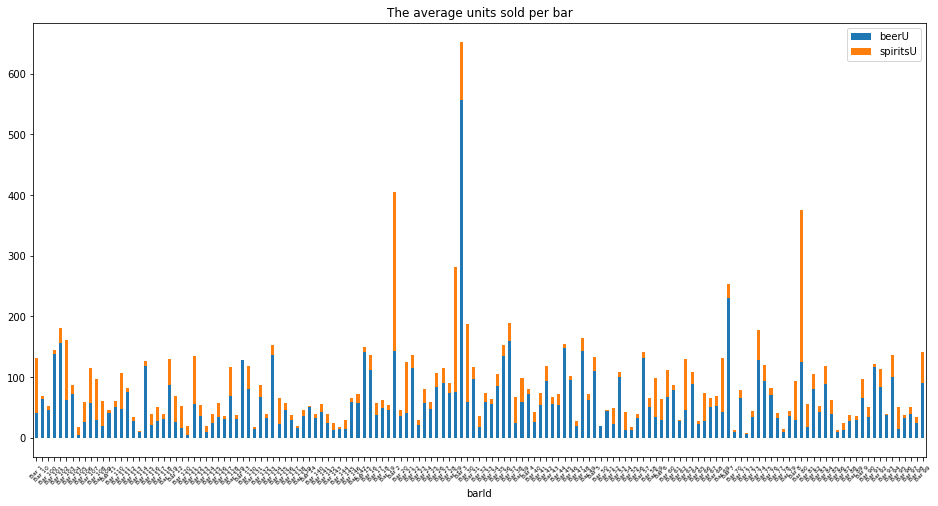

In [31]:
tmp = data.groupby('barId')[['beerU', 'spiritsU']].mean()
tmp.plot(kind='bar', stacked=True)
plt.rc
plt.xticks(rotation=45, size = 6)
plt.title('The average units sold per bar')

Text(0.5, 1.0, 'Distribution of bars by beer and spirits units sold')

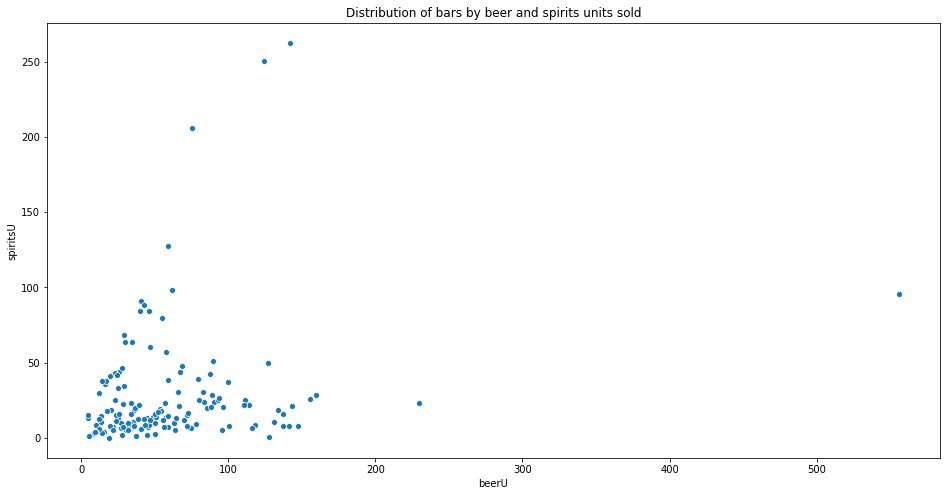

In [32]:
sns.scatterplot(data=data.groupby('barId')[['beerU', 'spiritsU']].mean(), x = 'beerU', y = 'spiritsU')
plt.title('Distribution of bars by beer and spirits units sold')

- From sample bars, beers are tend to be more frequently sought.
- However, the proportion vary much by bars.
- Clustering/grouping bars by characteristics may reveal different types of demands and explanation for cannibalization hypothesis for analysis.
___

## 2. Data pre-process

- Dealing with zeros
- Impossible values
- Outliers
- Preliminary variable selection / normalization

In [33]:
testData= data
testData.head()

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,month
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,68,461100,23500,0,54000,12,14,14,1,7,26881.818182,4500.0,July
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,63,298300,24000,0,18000,4,7,7,1,2,46612.500000,4500.0,July
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,57,234100,10000,0,27000,5,7,7,2,4,26140.909091,5625.0,July
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,35,222500,4000,0,27000,5,12,12,2,4,34593.750000,5625.0,July
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,20,92100,0,0,4500,1,7,7,1,1,28511.111111,4500.0,July


### Dealing with zeros

- The observation of zero values in units sold would imply two different cases  
    1. There is no market demand for the item on the day
    2. They do not sell the item from the bar
- The former reflect consumers' taste for the product.
- The letter is option unavailable to the market, which should be interpreted as NA instead of zero.
- Also for this project, the key variables are "Beer Units" and "Soju Units", and bars without items will be excluded for the analysis

In [34]:
tmp = testData.groupby('barId', as_index=False).sum().sort_values('sojuU')
tmp.head(15)

,barId,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
51,Bar 145,155.70,126.720,282.420,16508000,2696000,670,3428000,718,10065000,96000,0,0,0,197,188,0,0,2.113623e+06,0.0
49,Bar 143,185.50,146.230,331.730,16386500,2981200,758,2706000,603,8862300,154000,1683000,0,0,223,215,0,0,2.400752e+06,0.0
53,Bar 147,1325.10,90.750,1415.850,61162664,10026384,2547,2364713,607,47284946,1486621,0,0,0,758,726,0,0,9.208392e+05,0.0
25,Bar 121,70.00,21.120,91.120,8514882,699271,187,2354177,597,5370163,91271,0,0,0,65,64,0,0,1.377120e+06,0.0
59,Bar 2,12779.22,5193.350,17972.570,981541700,173039900,26144,335194000,48312,446390000,21024000,0,0,0,8866,8768,0,0,1.135304e+07,0.0
140,Bar 93,522.37,129.020,651.390,51407500,26429500,3931,987000,118,23015500,599500,0,0,0,965,759,0,0,4.914805e+06,0.0
63,Bar 23,2014.41,232.560,2246.970,93985355,20195544,3729,4717350,1282,65371121,3480340,0,0,0,1618,1588,0,0,6.857703e+06,0.0
70,Bar 3,48206.85,3530.805,51737.655,814204267,443657900,102359,86078000,17540,272560267,8422000,0,0,0,29472,26326,0,0,4.556365e+06,0.0
113,Bar 69,2314.20,1775.010,4089.210,149364000,32668500,6414,53575000,13245,57454500,5666000,0,0,0,2413,2388,0,0,4.192556e+06,0.0
83,Bar 41,2664.75,614.460,3279.210,82502783,30744959,6397,11715358,2317,38709926,1332540,0,0,0,1301,1190,0,0,6.560448e+06,0.0


In [35]:
barsWithoutSoju = tmp[tmp.sojuU==0].barId
barsWithoutSoju

51     Bar 145
49     Bar 143
53     Bar 147
25     Bar 121
59       Bar 2
140     Bar 93
63      Bar 23
70       Bar 3
113     Bar 69
83      Bar 41
107     Bar 63
36     Bar 131
93      Bar 50
3      Bar 101
106     Bar 62
Name: barId, dtype: object

- It seems there are 15 bars without any soju sales during the observation period
- These bars are likely that they do not service Soju

In [36]:
tmp = testData.groupby(['barId','month']).sum()
tmp[tmp.sojuU==0]

draughtV  packagedV    totalV     totalR     beerR  beerU  \
barId   month                                                                  
Bar 101 December    139.160    113.075   252.235   60003850  35590900   4256   
        November    107.580    155.365   262.945   52656200  32409500   3915   
        October      79.950     97.315   177.265   33750000  19937000   2532   
Bar 102 August      330.260     64.285   394.545   33523000  16202900   1815   
        September   663.260    248.910   912.170   86302627  39690200   4906   
Bar 121 December     43.000     10.230    53.230    4686882    397271    100   
        November     27.000     10.890    37.890    3828000    302000     87   
Bar 130 October     626.200    130.350   756.550   38243500   6035000   1429   
Bar 131 December      5.000      2.640     7.640     642800     70000     18   
        November    174.500     10.570   185.070    6462600   1568000    340   
        October      81.300      8.920    90.220    3842500    746500    190   
Bar 143 December    110.500     83.710   194.210    8692500   1676800    436   
        November     74.000     61.020   135.020    7497100   1276600    315   
        October       1.000      1.500     2.500     196900     27800      7   
Bar 145 December     70.200     79.860   150.060    8986500   1498500    366   
        November     78.500     42.570   121.070    6934500   1099500    282   
        October       7.000      4.290    11.290     587000     98000     22   
Bar 147 December    974.800     71.610  1046.410   44055364   7365384   1908   
        November    350.300     19.140   369.440   17107300   2661000    639   
Bar 2   August     2214.435   1089.350  3303.785  164883000  29526000   4394   
        December   2244.675   1152.240  3396.915  198419100  33519100   5131   
        July       2198.820    976.770  3175.590  161427900  28768900   4164   
        November   1774.040    548.960  2323.000  137219800  24490300   3672   
        October    2127.295    793.410  2920.705  159564600  28275600   4313   
        September  2219.955    632.620  2852.575  160027300  28460000   4470   
Bar 23  August      353.960     34.650   388.610   15107000   3418000    648   
        December    427.800     48.840   476.640   19514355   3967544    767   
        July        480.000     50.400   530.400   20470000   5093000    875   
        November    256.350     21.120   277.470   13507000   2483000    473   
        October     253.850     29.370   283.220   13653000   2649000    471   
...                     ...        ...       ...        ...       ...    ...   
Bar 47  August      204.004     65.670   269.674   42239600   4738000    651   
Bar 50  December    122.640     43.230   165.870   85615926   3201459    516   
        November     90.330     40.260   130.590   63726571   2585531    530   
Bar 55  August      149.500     45.910   195.410    3544000   1323000    385   
        July         38.000     18.500    56.500    1176000    376000    113   
        September    61.000     62.000   123.000    2874000    980000    263   
Bar 58  July        216.300     23.760   240.060    6553100   1594500    451   
Bar 62  August      155.420     15.240   170.660   28311500   9231000    823   
        December     99.560     17.910   117.470   34116000   7888000    653   
        November     79.420     11.730    91.150   20875500   7323000    595   
        October      46.740     10.020    56.760   16150000   4477000    362   
        September   175.560     13.260   188.820   36455500  10205000    942   
Bar 63  August      188.000     85.500   273.500   10754000   2117500    378   
        December    846.400    417.620  1264.020   50619692   9403206   1644   
        November    606.900    372.310   979.210   38908000   7828000   1391   
        October     640.200    286.450   926.650   37374500   7165000   1218   
        September   634.800    297.310   932.110   35671500   7220000   1222   
Bar 67  October    

In [37]:
testData[testData.barId=='Bar 29']

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,month
4478,Bar 29,2017-07-01,"Food,Spirits",49.5,29.70,79.20,4989100,660000,121,1774000,408,2301100,244000,0,0,0,45,45,0,0,39912.800000,0.0,July
4479,Bar 29,2017-07-02,"Food,Spirits",11.5,7.59,19.09,1565400,160000,29,692000,148,661400,52000,0,0,0,15,15,0,0,35577.272727,0.0,July
4480,Bar 29,2017-07-03,"Food,Spirits",20.0,8.91,28.91,1402000,228000,39,587000,95,519000,68000,0,0,0,15,15,0,0,38944.444444,0.0,July
4481,Bar 29,2017-07-04,"Food,Spirits",6.5,9.57,16.07,1026200,156000,33,340000,85,480200,50000,0,0,0,16,16,0,0,29320.000000,0.0,July
4482,Bar 29,2017-07-05,"Food,Spirits",3.0,7.26,10.26,1184800,104000,23,563000,93,435800,82000,0,0,0,11,11,0,0,32911.111111,0.0,July
4483,Bar 29,2017-07-06,"Food,Spirits",15.5,4.29,19.79,897100,138000,38,281500,94,453600,24000,0,157500,63,19,19,13,26,24919.444444,2500.0,July
4484,Bar 29,2017-07-07,"Food,Spirits",110.0,36.30,146.30,5136000,1068000,222,1544500,412,2325500,198000,0,247500,99,69,69,32,45,38616.541353,2500.0,July
4485,Bar 29,2017-07-08,"Food,Spirits",77.5,17.82,95.32,5581700,684500,134,1996900,519,2666300,234000,0,267500,107,60,59,21,39,36964.900662,2500.0,July
4486,Bar 29,2017-07-09,"Food,Spirits",39.5,11.22,50.72,1804200,365500,76,552000,140,772700,114000,0,115000,46,26,26,9,18,34696.153846,2500.0,July
4487,Bar 29,2017-07-10,"Food,Spirits",14.5,5.94,20.44,1690000,162500,30,687500,173,760000,80000,0,82500,33,13,13,1,15,35957.446809,2500.0,July


- There are also bars where soju sales were 0 on ceratin months.
- Sampling the bar data, I could note that there is continuity or pattern in the dates with 0 Soju Units
- I may interview bar owner or employees at OB for more domain information, but relying on my subjective opinion could be misleading the findings: **keep the data**
___

### impossible values

- negative figures is impossible on daily summed POS data
- Order counts may have integrity issues (i.e. # of beer & soju order exceeding # of beer order)

In [38]:
# to test if any value in row contains negative value
def detect_integrity(row):
    
    ln = len(row)
    test = 0
    
    for i in range(ln):
        test += (row[i] < 0)
    # test each value and add count if wrong
    
    result = False
    if test != 0:
        result = True
    # if count is not 0, return False
    
    return result

In [39]:
detectFalseIdx = testData.iloc[:,3:-1].apply(lambda x: detect_integrity(x), axis=1)
testData[detectFalseIdx]

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,month
491,Bar 3,2017-12-18,"Beer,Food",19.520,-19.875,-0.355,640300,-151200,-23,210000,53,565500,16000,0,0,0,97,85,0,0,5666.371681,0.0,December
7022,Bar 47,2017-09-06,Food,4.260,1.980,6.240,823700,111000,15,-69000,-11,717700,64000,0,0,0,5,5,0,0,37440.909091,0.0,September
7419,Bar 50,2017-11-08,Food,1.320,1.320,2.640,2130058,51820,8,0,-12,1991866,50008,36364,0,0,4,4,0,0,47334.622222,0.0,November
9531,Bar 67,2017-10-31,Food,0.000,0.000,0.000,-62727,0,0,0,0,-65456,0,0,0,0,0,0,0,0,-31363.500000,0.0,October
9971,Bar 70,2017-11-01,Food,3.420,0.330,3.750,449700,72000,8,16000,3,175700,6000,180000,-24000,-1,3,3,0,0,56212.500000,24000.0,November
12178,Bar 91,2017-09-25,Food,9.905,12.310,22.215,675900,327700,46,-38500,-5,389100,7500,0,8000,2,16,13,3,3,35573.684211,4000.0,September
14268,Bar 111,2017-12-05,Food,4.180,-0.680,3.500,3368500,107000,11,865000,38,2372500,24000,0,70000,14,5,5,4,6,73228.260870,5000.0,December


In [40]:
testData = testData[~detectFalseIdx]
testData.describe()

,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
count,16628.000000,16628.000000,16628.000000,1.662800e+04,1.662800e+04,16628.000000,1.662800e+04,16628.000000,1.662800e+04,1.662800e+04,1.662800e+04,1.662800e+04,16628.000000,16628.000000,16628.000000,16628.000000,16628.000000,1.662800e+04,16628.000000
mean,24.736290,5.744157,30.480447,1.311021e+06,3.455347e+05,66.110236,1.534601e+05,30.312184,7.614733e+05,3.045135e+04,4.785816e+03,7.919263e+04,18.066574,18.684568,17.261186,4.302021,7.318800,3.839360e+04,3327.694319
std,34.589754,7.823854,37.787740,1.693584e+06,4.249345e+05,75.734902,2.915358e+05,52.085920,1.252385e+06,8.805372e+04,3.453643e+04,1.211500e+05,26.868548,20.607597,18.751609,5.036722,9.189239,3.005238e+04,2134.346438
min,0.000000,0.000000,0.000000,3.500000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.633333e+03,0.000000
25%,6.177500,1.000000,10.220000,5.303750e+05,1.082250e+05,23.000000,3.100000e+04,7.000000,2.634750e+05,4.000000e+03,0.000000e+00,8.000000e+03,2.000000,8.000000,7.000000,1.000000,1.000000,2.503921e+04,4000.000000
50%,16.000000,3.300000,21.150000,9.042500e+05,2.164500e+05,46.000000,7.000000e+04,15.000000,4.880000e+05,1.200000e+04,0.000000e+00,4.400000e+04,11.000000,14.000000,13.000000,3.000000,5.000000,3.413993e+04,4000.000000
75%,31.500000,7.260000,38.360000,1.502666e+06,4.102750e+05,85.000000,1.568250e+05,32.000000,8.853390e+05,2.800000e+04,0.000000e+00,1.000000e+05,24.000000,23.000000,22.000000,6.000000,10.000000,4.567781e+04,4000.000000
max,483.060000,126.720000,515.390000,4.666240e+07,4.452700e+06,1004.000000,5.468500e+06,834.000000,4.029460e+07,1.804500e+06,1.167000e+06,2.281500e+06,507.000000,283.000000,244.000000,86.000000,158.000000,2.687000e+06,25000.000000


- There are only four data with negative values
- There might have been refund from previous day, but since the size of data is not too big, remove the rows for analysis for integrity

In [41]:
print(len(testData))
print(testData.apply(lambda x: x['beerO'] >= x['beerFoodO'], axis=1).sum())
print(testData.apply(lambda x: x['beerO'] >= x['sojuBeerO'], axis=1).sum())

16628
16628
16628


- Order count derived from "# Beer Orders" do not exceed "# Beer Orders".
___

### Outliers

- One of the best way to detect outlier/abnomality, is by comparing fixed variable to ratio-base derivative. (For this case, price to revenue/unit)
- We do not have price information, but if observations from ratio-base derivative is far exceeding (99.7CI, 1.5IQR boundary, or by other measures), it has great potential to be considered as abnormality.
- I can also check boxplot, distribution of values with own eyes.

In [42]:
testData['beerP'] = testData.beerR/testData.beerU
testData['spiritsP'] = testData.spiritsR/testData.spiritsU
testData['sojuP'] = testData.sojuR/testData.sojuU

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [43]:
testData.fillna(0).describe()

,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,beerP,spiritsP
count,16628.000000,16628.000000,16628.000000,1.662800e+04,1.662800e+04,16628.000000,1.662800e+04,16628.000000,1.662800e+04,1.662800e+04,1.662800e+04,1.662800e+04,16628.000000,16628.000000,16628.000000,16628.000000,16628.000000,1.662800e+04,1.662800e+04,16628.000000,16628.000000
mean,24.736290,5.744157,30.480447,1.311021e+06,3.455347e+05,66.110236,1.534601e+05,30.312184,7.614733e+05,3.045135e+04,4.785816e+03,7.919263e+04,18.066574,18.684568,17.261186,4.302021,7.318800,3.839360e+04,inf,5154.090729,5241.534416
std,34.589754,7.823854,37.787740,1.693584e+06,4.249345e+05,75.734902,2.915358e+05,52.085920,1.252385e+06,8.805372e+04,3.453643e+04,1.211500e+05,26.868548,20.607597,18.751609,5.036722,9.189239,3.005238e+04,NaN,2360.741872,6869.813612
min,0.000000,0.000000,0.000000,3.500000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.633333e+03,0.000000e+00,0.000000,0.000000
25%,6.177500,1.000000,10.220000,5.303750e+05,1.082250e+05,23.000000,3.100000e+04,7.000000,2.634750e+05,4.000000e+03,0.000000e+00,8.000000e+03,2.000000,8.000000,7.000000,1.000000,1.000000,2.503921e+04,3.636562e+03,3818.181818,4000.000000
50%,16.000000,3.300000,21.150000,9.042500e+05,2.164500e+05,46.000000,7.000000e+04,15.000000,4.880000e+05,1.200000e+04,0.000000e+00,4.400000e+04,11.000000,14.000000,13.000000,3.000000,5.000000,3.413993e+04,4.000000e+03,4491.806830,4000.000000
75%,31.500000,7.260000,38.360000,1.502666e+06,4.102750e+05,85.000000,1.568250e+05,32.000000,8.853390e+05,2.800000e+04,0.000000e+00,1.000000e+05,24.000000,23.000000,22.000000,6.000000,10.000000,4.567781e+04,4.000000e+03,5843.750000,4668.801034
max,483.060000,126.720000,515.390000,4.666240e+07,4.452700e+06,1004.000000,5.468500e+06,834.000000,4.029460e+07,1.804500e+06,1.167000e+06,2.281500e+06,507.000000,283.000000,244.000000,86.000000,158.000000,2.687000e+06,inf,44074.025974,290000.000000


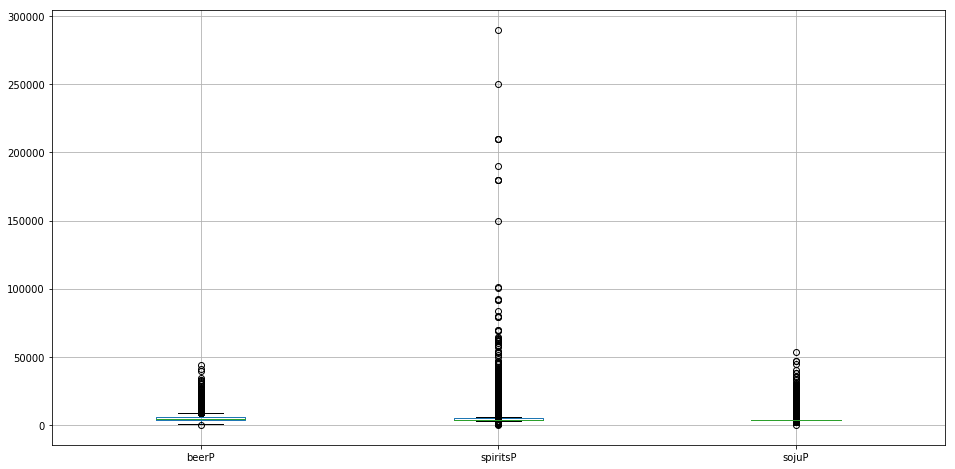

In [44]:
testData[['beerP', 'spiritsP', 'sojuP']].boxplot()

In [45]:
testData[['beerP', 'spiritsP', 'sojuP']].describe()

,beerP,spiritsP,sojuP
count,16506.000000,15868.000000,1.308100e+04
mean,5192.185911,5492.578414,inf
std,2327.334878,6933.678318,NaN
min,0.000000,0.000000,0.000000e+00
25%,3833.333333,4000.000000,4.000000e+03
50%,4500.000000,4000.000000,4.000000e+03
75%,5857.142857,4800.000000,4.000000e+03
max,44074.025974,290000.000000,inf


- It has come to my attension that:
    1. "soju price" still has outlier (`inf`), and
    2. "spirits price seems very volitle"
    

In [46]:
testData.sort_values('sojuP', ascending=False).head()

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,month,beerP,spiritsP
14435,Bar 113,2017-12-29,Food,4.85,14.24,19.09,2069618,288646,48,116822,3,1561868,74100,0,9092,0,16,16,0,1,42237.102041,inf,December,6013.458333,38940.666667
14757,Bar 118,2017-10-29,Food,7.50,7.26,14.76,2663500,461000,36,161500,3,1795000,246000,0,161500,3,7,7,3,3,47562.500000,5.383333e+04,October,12805.555556,53833.333333
14756,Bar 118,2017-10-28,Food,23.50,0.66,24.16,3434500,502000,46,281000,6,2118000,533500,0,281000,6,13,12,3,3,47701.388889,4.683333e+04,October,10913.043478,46833.333333
4405,Bar 28,2017-10-20,Food,71.10,3.92,75.02,10812000,1570000,104,794000,17,6193000,783000,0,794000,17,42,41,7,12,62137.931034,4.670588e+04,October,15096.153846,46705.882353
12921,Bar 98,2017-11-07,Food,21.00,0.50,21.50,2213000,399000,42,178000,4,1418000,211000,0,178000,4,9,9,3,3,58236.842105,4.450000e+04,November,9500.000000,44500.000000


In [47]:
testData = testData[testData.index!=14435]
testData[['beerP', 'spiritsP', 'sojuP']].describe()

,beerP,spiritsP,sojuP
count,16505.000000,15867.000000,13080.000000
mean,5192.136152,5490.470385,4613.777682
std,2327.396605,6928.809907,2991.856464
min,0.000000,0.000000,0.000000
25%,3833.333333,4000.000000,4000.000000
50%,4500.000000,4000.000000,4000.000000
75%,5857.142857,4800.000000,4000.000000
max,44074.025974,290000.000000,53833.333333


- Impossible value on soju Price fixed
- Although the derivatives do not seem to follow normal distribution, the definition of price should follow normal distribution.
- Data exceeding relative price outside 99.7% credential interval (3std from mean) can be considered outlier.
- Also the count of observasions vary and it might have been because of NAs.

In [48]:
tmp = testData[['beerP', 'spiritsP', 'sojuP']].describe()
beerLimit = tmp.loc['mean', 'beerP'] + 3* tmp.loc['std','beerP']
sojuLimit = tmp.loc['mean', 'sojuP'] + 3* tmp.loc['std','sojuP']
spiritsLimit = tmp.loc['mean', 'spiritsP'] + 3* tmp.loc['std','spiritsP']

In [49]:
print(sum(testData.beerP>=beerLimit), sum(testData.sojuP>=sojuLimit), sum(testData.spiritsP>=spiritsLimit))

print(len(testData[(testData.beerP>=beerLimit) | (testData.sojuP>=sojuLimit) | (testData.spiritsP>=spiritsLimit)]))

342 370 144
593


- 602 observations are suspicious of abnormality: remove

In [50]:
idx = ((testData.beerP>=beerLimit) | (testData.sojuP>=sojuLimit) | (testData.spiritsP>=spiritsLimit))
testData = testData[~idx]
testData.head()

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,month,beerP,spiritsP
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,68,461100,23500,0,54000,12,14,14,1,7,26881.818182,4500.0,July,5659.090909,4088.235294
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,63,298300,24000,0,18000,4,7,7,1,2,46612.500000,4500.0,July,10468.750000,4063.492063
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,57,234100,10000,0,27000,5,7,7,2,4,26140.909091,5400.0,July,7250.000000,4157.894737
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,35,222500,4000,0,27000,5,12,12,2,4,34593.750000,5400.0,July,6846.153846,4171.428571
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,20,92100,0,0,4500,1,7,7,1,1,28511.111111,4500.0,July,4941.176471,4025.000000


In [51]:
testData[testData.beerP.isna()].head(10)

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,month,beerP,spiritsP
71,Bar 1,2017-09-24,"Food,Spirits",0.0,0.0,0.0,36900,0,0,20000,5,16900,0,0,0,0,0,0,0,0,18450.000000,NaN,September,NaN,4000.000000
114,Bar 1,2017-12-04,"Food,Spirits",0.0,0.0,0.0,7900,0,0,4000,3,3900,0,0,0,2,0,0,0,2,2633.333333,0.000000,December,NaN,1333.333333
3510,Bar 21,2017-12-17,"Food,Spirits",0.0,0.0,0.0,232500,0,0,81000,18,147500,4000,0,81000,18,0,0,0,7,33214.285714,4500.000000,December,NaN,4500.000000
4882,Bar 32,2017-07-03,"Food,Spirits",0.0,0.0,0.0,234600,0,0,42900,11,111700,0,0,42900,11,0,0,0,3,33514.285714,3900.000000,July,NaN,3900.000000
5002,Bar 32,2017-11-29,"Food,Spirits",0.0,0.0,0.0,200000,0,0,29300,7,130700,0,0,29300,7,0,0,0,2,28571.428571,4185.714286,November,NaN,4185.714286
5672,Bar 37,2017-07-08,"Beer,Food",0.0,0.0,0.0,19000,0,0,0,0,19000,0,0,0,0,0,0,0,0,19000.000000,NaN,July,NaN,NaN
6540,Bar 43,2017-08-26,"Beer,Food",0.0,0.0,0.0,16500,0,0,0,0,15000,1500,0,0,0,0,0,0,0,16500.000000,NaN,August,NaN,NaN
7042,Bar 47,2017-09-27,Food,0.0,0.0,0.0,434000,0,0,18000,3,370000,46000,0,18000,3,0,0,0,1,39454.545455,6000.000000,September,NaN,6000.000000
7113,Bar 47,2017-12-18,Food,0.0,0.0,0.0,562100,0,0,51000,4,487100,24000,0,0,0,0,0,0,0,40150.000000,NaN,December,NaN,12750.000000
7802,Bar 54,2017-08-27,"Food,Spirits",0.0,0.0,0.0,41500,0,0,20000,5,21500,0,0,20000,5,0,0,0,1,41500.000000,4000.000000,August,NaN,4000.000000


- The NAs have been created dividing by 0 units.
- Simply replace NAs to zero to complete data.

In [52]:
testData = testData.fillna(0)
testData.describe()

,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,beerP,spiritsP
count,16034.000000,16034.000000,16034.000000,1.603400e+04,1.603400e+04,16034.000000,1.603400e+04,16034.000000,1.603400e+04,16034.000000,1.603400e+04,1.603400e+04,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000
mean,24.691388,5.731825,30.423213,1.197876e+06,3.305931e+05,66.121554,1.502877e+05,30.966446,6.816350e+05,21519.901958,3.746870e+03,7.543316e+04,18.340526,18.599850,17.197518,4.332606,7.393102,37176.364941,3248.953493,4881.058002,4543.057325
std,34.801169,7.777171,38.037245,1.108586e+06,4.064016e+05,76.359672,2.934255e+05,52.879256,6.689347e+05,30904.750416,2.812028e+04,1.148605e+05,27.233513,20.740584,18.864199,5.069720,9.291509,17752.822828,1770.782920,1602.802505,2357.000153
min,0.000000,0.000000,0.000000,3.500000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2633.333333,0.000000,0.000000,0.000000
25%,6.202500,1.000000,10.242500,5.216250e+05,1.065000e+05,23.000000,3.000000e+04,7.000000,2.610000e+05,4000.000000,0.000000e+00,8.000000e+03,2.000000,8.000000,7.000000,1.000000,1.000000,24842.670918,3636.546188,3795.128514,4000.000000
50%,15.900000,3.300000,21.005000,8.830000e+05,2.109165e+05,46.000000,6.800000e+04,16.000000,4.820000e+05,12000.000000,0.000000e+00,4.400000e+04,11.000000,14.000000,13.000000,3.000000,5.000000,33705.751880,4000.000000,4441.876179,4000.000000
75%,31.250000,7.260000,38.020000,1.457300e+06,3.925000e+05,84.000000,1.506500e+05,33.000000,8.594750e+05,26000.000000,0.000000e+00,9.850000e+04,24.000000,23.000000,22.000000,6.000000,10.000000,44502.500000,4000.000000,5645.684677,4500.000000
max,483.060000,126.720000,515.390000,1.321410e+07,4.452700e+06,1004.000000,5.468500e+06,834.000000,8.266700e+06,460000.000000,1.167000e+06,2.281500e+06,507.000000,283.000000,244.000000,86.000000,158.000000,355333.333333,13272.222222,12157.894737,26275.000000


### Preliminary variable selection / normalization

- Given the purpose of analysis, I will have `Beer Units`(demand for beer) for dependent variable, and other variables on the other side to explain beer demand.
- I will have regression to how much impact soju demand has on beer units, and will also have CART to see wich explanatory variable is  most relevant to determine beer demand, given dataset.
- I will priliminarily select variables based on rational ground, and normalize them if necessary for regression.

1. Volume over Revenue:
    - Revenue and volume are highly correlated, and need to choose one over the other.
    - In this case, volume is more directly related to customer demand as revenue is outcome after unit x price, where price can be effected by externalities (i.e. promotion)  
    

2. Avoid duplication:
    - Variable like "Total Volume(L)" is simply a sum of draught and packaged volume, which then is duplication of information and could cause multicollinearity.
    - Keep the detailed ones, omit aggregated information

In [53]:
testSet = testData.loc[:, ['barId', 'segment', 'date', 'month',
                           'draughtV', 'packagedV', 'beerU', 'spiritsU', 'sojuU',
                           'foodR', 'nonAlcoholR', 'beerO', 'beerFoodO', 'sojuBeerO', 'sojuFoodO',
                           'avgCheck', 'sojuP', 'beerP', 'spiritsP']]

In [54]:
testSet.describe()

,draughtV,packagedV,beerU,spiritsU,sojuU,foodR,nonAlcoholR,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,beerP,spiritsP
count,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000,1.603400e+04,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000,16034.000000
mean,24.691388,5.731825,66.121554,30.966446,18.340526,6.816350e+05,21519.901958,18.599850,17.197518,4.332606,7.393102,37176.364941,3248.953493,4881.058002,4543.057325
std,34.801169,7.777171,76.359672,52.879256,27.233513,6.689347e+05,30904.750416,20.740584,18.864199,5.069720,9.291509,17752.822828,1770.782920,1602.802505,2357.000153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2633.333333,0.000000,0.000000,0.000000
25%,6.202500,1.000000,23.000000,7.000000,2.000000,2.610000e+05,4000.000000,8.000000,7.000000,1.000000,1.000000,24842.670918,3636.546188,3795.128514,4000.000000
50%,15.900000,3.300000,46.000000,16.000000,11.000000,4.820000e+05,12000.000000,14.000000,13.000000,3.000000,5.000000,33705.751880,4000.000000,4441.876179,4000.000000
75%,31.250000,7.260000,84.000000,33.000000,24.000000,8.594750e+05,26000.000000,23.000000,22.000000,6.000000,10.000000,44502.500000,4000.000000,5645.684677,4500.000000
max,483.060000,126.720000,1004.000000,834.000000,507.000000,8.266700e+06,460000.000000,283.000000,244.000000,86.000000,158.000000,355333.333333,13272.222222,12157.894737,26275.000000


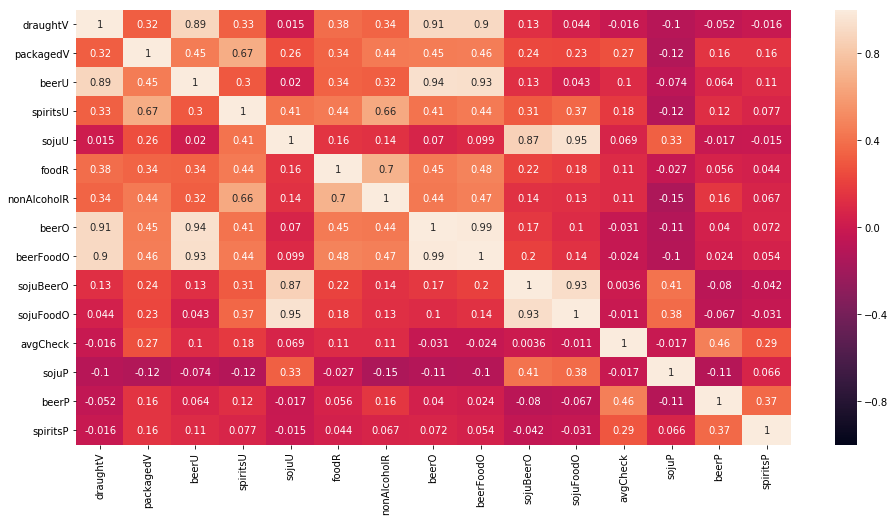

In [55]:
sns.heatmap(testSet.corr(), vmin=-1, vmax=1, annot=True)

- Remove "Beer & Food Orders", "Soju & Food Orders", as they are highly correlated.
- Also, order variables and volume variables for draught and packaged are duplicates to actual units sold, so removed.
- This may imply **strong characteristics of Korean customers drinking while having a meal.**

In [56]:
testSet = testSet.drop(['draughtV', 'packagedV', 'beerO', 'beerFoodO', 'sojuFoodO', 'sojuBeerO'], axis=1)

Text(0.5, 1.05, 'The distribution of values in variables')

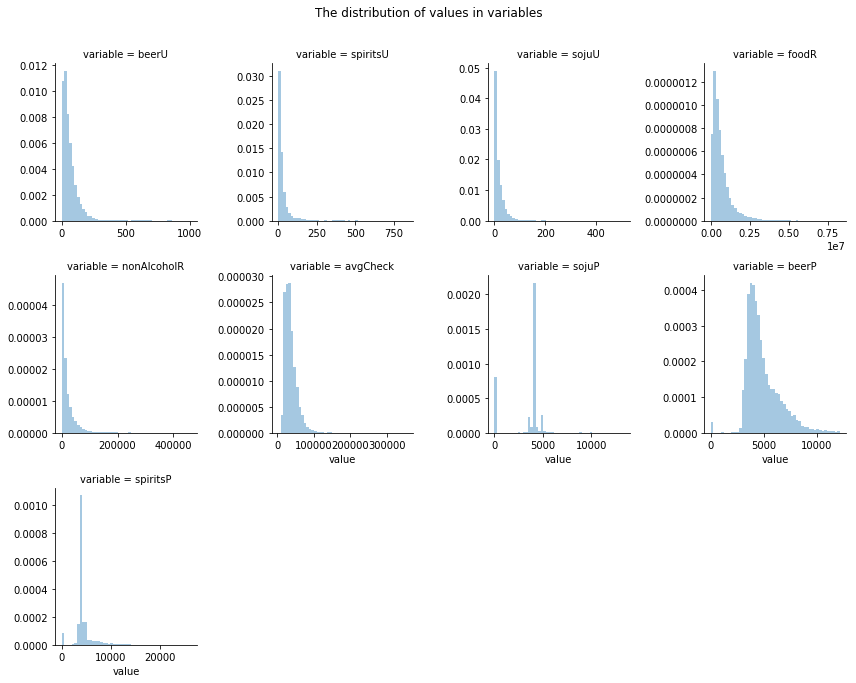

In [57]:
g = sns.FacetGrid(data=testSet.iloc[:,4:].melt(), col = 'variable', col_wrap = 4, sharey=False, sharex=False)
g.map(sns.distplot, 'value', kde=False, norm_hist=True)
plt.suptitle("The distribution of values in variables", y = 1.05)

In [58]:
testSetReg = testSet[:]

In [59]:
for name in testSetReg.columns[4:-3]:
    testSetReg[name] = log(testSetReg[name]+1)

Text(0.5, 1.05, 'The distribution of values in variables after log transformation')

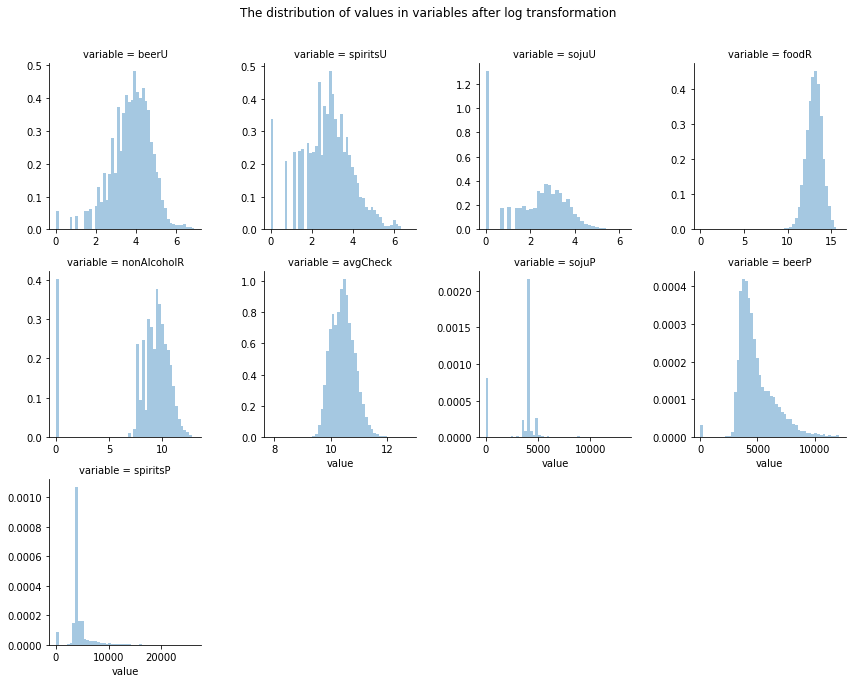

In [60]:
g = sns.FacetGrid(data=testSetReg.iloc[:,4:].melt(), col = 'variable', col_wrap = 4, sharey=False, sharex=False)
g.map(sns.distplot, 'value', kde=False, norm_hist=True)
plt.suptitle("The distribution of values in variables after log transformation", y = 1.05)

- To better study the relationship between demand for beer and soju, log transformation on variables transforms the shape of data to follow normal distribution.
- I can explain the effect of `log(variable)` as "% change in variable"
___

### Dealing with categorical data

- There are 3 categorical variables in the data: "Bar ID", "Bar segmentation", "month"
- I will one-hot encode those variables so to add to the model.
- The variable Bar segmentaion will not be included, as most bars sold food too, and the sales of beer and spirits are pretty much self explanatory from the data.
- In that case, the effect of categorical variables will be eliminated to see the true relationship between beer and soju demand.
- Also derived from date variable, include "day" data to the model, as day is determinant variable to bevearage compumption towards weekend.

In [61]:
testSet.head()

,barId,segment,date,month,beerU,spiritsU,sojuU,foodR,nonAlcoholR,avgCheck,sojuP,beerP,spiritsP
0,Bar 1,"Food,Spirits",2017-07-01,July,22,68,12,461100,23500,10.199243,4500.0,5659.090909,4088.235294
1,Bar 1,"Food,Spirits",2017-07-02,July,16,63,4,298300,24000,10.749645,4500.0,10468.750000,4063.492063
2,Bar 1,"Food,Spirits",2017-07-03,July,12,57,5,234100,10000,10.171295,5400.0,7250.000000,4157.894737
3,Bar 1,"Food,Spirits",2017-07-04,July,26,35,5,222500,4000,10.451457,5400.0,6846.153846,4171.428571
4,Bar 1,"Food,Spirits",2017-07-05,July,17,20,1,92100,0,10.258084,4500.0,4941.176471,4025.000000


In [62]:
def OneHotEnc(column):
    enc = OneHotEncoder()
    enc.fit(np.array(column).reshape(-1,1))
    encOH = enc.transform(np.array(column).reshape(-1,1)).toarray()
    return pd.DataFrame(encOH,columns=column.unique())

In [63]:
testSet = testSet.reset_index(drop=True)

In [64]:
testSet = pd.concat([testSet,OneHotEnc(testSet.barId)], axis=1)
testSet = pd.concat([testSet,OneHotEnc(testSet.month)], axis=1)

In [65]:
enc = OneHotEncoder()
enc.fit(np.array([day.dayofweek for day in testSet.date]).reshape(-1,1))
encOH = enc.transform(np.array([day.dayofweek for day in testSet.date]).reshape(-1,1)).toarray()
day = pd.DataFrame(encOH, columns = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])

In [66]:
testSet = pd.concat([testSet,day], axis=1)

In [67]:
testSet.head()

,barId,segment,date,month,beerU,spiritsU,sojuU,foodR,nonAlcoholR,avgCheck,sojuP,beerP,spiritsP,Bar 1,Bar 2,Bar 3,Bar 4,Bar 5,Bar 6,Bar 7,Bar 8,Bar 9,Bar 10,Bar 11,Bar 12,Bar 13,Bar 14,Bar 15,Bar 16,Bar 17,Bar 18,Bar 19,Bar 20,Bar 21,Bar 22,Bar 23,Bar 24,Bar 25,Bar 26,Bar 27,Bar 28,Bar 29,Bar 30,Bar 31,Bar 32,Bar 33,Bar 34,Bar 35,Bar 36,Bar 37,Bar 38,Bar 39,Bar 40,Bar 41,Bar 42,Bar 43,Bar 44,Bar 45,Bar 46,Bar 47,Bar 48,Bar 49,Bar 50,Bar 51,Bar 52,Bar 53,Bar 54,Bar 55,Bar 56,Bar 57,Bar 58,Bar 59,Bar 60,Bar 61,Bar 62,Bar 63,Bar 64,Bar 65,Bar 66,Bar 67,Bar 68,Bar 69,Bar 70,Bar 71,Bar 72,Bar 73,Bar 74,Bar 75,Bar 76,Bar 77,Bar 78,Bar 79,Bar 80,Bar 81,Bar 82,Bar 83,Bar 84,Bar 85,Bar 86,Bar 87,Bar 88,Bar 89,Bar 90,Bar 91,Bar 92,Bar 93,Bar 94,Bar 95,Bar 96,Bar 97,Bar 98,Bar 99,Bar 100,Bar 101,Bar 102,Bar 103,Bar 104,Bar 105,Bar 106,Bar 107,Bar 108,Bar 109,Bar 110,Bar 111,Bar 112,Bar 113,Bar 114,Bar 115,Bar 116,Bar 117,Bar 118,Bar 119,Bar 120,Bar 121,Bar 122,Bar 123,Bar 124,Bar 125,Bar 126,Bar 127,Bar 128,Bar 129,Bar 130,Bar 131,Bar 132,Bar 133,Bar 134,Bar 135,Bar 136,Bar 137,Bar 138,Bar 139,Bar 140,Bar 141,Bar 142,Bar 143,Bar 144,Bar 145,Bar 146,Bar 147,July,August,September,October,November,December,mon,tue,wed,thu,fri,sat,sun
0,Bar 1,"Food,Spirits",2017-07-01,July,22,68,12,461100,23500,10.199243,4500.0,5659.090909,4088.235294,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Bar 1,"Food,Spirits",2017-07-02,July,16,63,4,298300,24000,10.749645,4500.0,10468.750000,4063.492063,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Bar 1,"Food,Spirits",2017-07-03,July,12,57,5,234100,10000,10.171295,5400.0,7250.000000,4157.894737,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bar 1,"Food,Spirits",2017-07-04,July,26,35,5,222500,4000,10.451457,5400.0,6846.153846,4171.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [68]:
testSetReg = testSetReg.reset_index(drop=True)
testSetReg = pd.concat([testSetReg, testSet.iloc[:,16:]], axis=1)

## 2. Modeling for Analysis

- As said over times, both regression analysis and CART models will be used to understand relationship between soju and beer.
- The purpose of the analysis is not with forecasting, so I will not divide the data into train set and data set.
- However, I will choose to combine weak-leaners to create more robust model for explanation.
- For regression model, I will bootstrap and aggregate ridge/lasso models to select model.
- For CART model, I will choose Random Forests to see the feature importance

### Regression: bagging + Ridge

In [69]:
def bootsTrap(data, size=0.7, seed=None):
    if seed==None:
        pass
    else:
        np.random.seed(seed)
    tmpIdx = np.random.choice(data.index, size = int(size*len(data)))
    tmpIdx = pd.DataFrame(tmpIdx, columns = ['idx'])
    tmpdf = pd.merge(tmpIdx, data, left_on='idx', right_index=True)
    return tmpdf.drop('idx', axis=1).reset_index(drop=True)

# sampling with replacement

In [70]:
tmp = bootsTrap(testSetReg, seed=1)
y = tmp.beerU
X = tmp.iloc[:,4:].drop('beerU', axis=1)
model = Ridge(alpha=0.5, normalize=True)
model.fit(X, y)
pd.DataFrame(model.coef_, index = X.columns, columns = ['coef']).T

# sample Ridge regression over 1 subsample

,spiritsU,sojuU,foodR,nonAlcoholR,avgCheck,sojuP,beerP,spiritsP,Bar 4,Bar 5,Bar 6,Bar 7,Bar 8,Bar 9,Bar 10,Bar 11,Bar 12,Bar 13,Bar 14,Bar 15,Bar 16,Bar 17,Bar 18,Bar 19,Bar 20,Bar 21,Bar 22,Bar 23,Bar 24,Bar 25,Bar 26,Bar 27,Bar 28,Bar 29,Bar 30,Bar 31,Bar 32,Bar 33,Bar 34,Bar 35,Bar 36,Bar 37,Bar 38,Bar 39,Bar 40,Bar 41,Bar 42,Bar 43,Bar 44,Bar 45,Bar 46,Bar 47,Bar 48,Bar 49,Bar 50,Bar 51,Bar 52,Bar 53,Bar 54,Bar 55,Bar 56,Bar 57,Bar 58,Bar 59,Bar 60,Bar 61,Bar 62,Bar 63,Bar 64,Bar 65,Bar 66,Bar 67,Bar 68,Bar 69,Bar 70,Bar 71,Bar 72,Bar 73,Bar 74,Bar 75,Bar 76,Bar 77,Bar 78,Bar 79,Bar 80,Bar 81,Bar 82,Bar 83,Bar 84,Bar 85,Bar 86,Bar 87,Bar 88,Bar 89,Bar 90,Bar 91,Bar 92,Bar 93,Bar 94,Bar 95,Bar 96,Bar 97,Bar 98,Bar 99,Bar 100,Bar 101,Bar 102,Bar 103,Bar 104,Bar 105,Bar 106,Bar 107,Bar 108,Bar 109,Bar 110,Bar 111,Bar 112,Bar 113,Bar 114,Bar 115,Bar 116,Bar 117,Bar 118,Bar 119,Bar 120,Bar 121,Bar 122,Bar 123,Bar 124,Bar 125,Bar 126,Bar 127,Bar 128,Bar 129,Bar 130,Bar 131,Bar 132,Bar 133,Bar 134,Bar 135,Bar 136,Bar 137,Bar 138,Bar 139,Bar 140,Bar 141,Bar 142,Bar 143,Bar 144,Bar 145,Bar 146,Bar 147,July,August,September,October,November,December,mon,tue,wed,thu,fri,sat,sun
coef,0.08533,0.015782,0.238879,0.020148,0.135965,0.000009,0.000009,0.000007,0.678617,0.555799,0.055809,0.207518,-1.428897,-0.42465,-0.213116,-0.6865,-0.672357,-0.079782,0.020847,-0.437163,0.555391,-0.698957,-0.900435,0.815396,-0.356618,-0.338076,-0.216772,0.348849,-0.495407,-0.845825,-1.245348,-0.074652,-0.014825,-0.693548,-0.207164,-0.023404,-0.212333,0.13981,-0.198453,1.019071,0.18765,-0.620821,0.336324,-0.161054,0.842868,-0.688917,0.06481,-0.291308,-0.48939,-0.138358,-0.007153,0.085466,-0.086005,-0.264661,-0.366847,-0.704391,-0.625125,0.507579,0.206103,0.615495,0.363354,-0.211099,-0.002607,-0.046796,0.222026,-0.098135,-0.465428,0.422896,-0.486782,0.000906,-0.185504,0.091907,0.21094,0.049806,-0.020804,1.427565,-0.020763,0.220801,-0.53832,0.249,0.023498,0.412806,0.536326,0.495499,-0.538878,-0.127715,0.505851,-0.340919,0.160483,0.396844,0.01198,0.188228,0.953409,0.626903,-0.736755,0.839795,0.255799,0.520383,-0.815864,-0.254963,-0.734779,0.852929,-0.939564,-0.423313,-0.21668,0.661025,0.104034,-0.218811,-0.351879,0.111542,0.405337,-0.309379,-0.150629,0.470518,-0.416769,-0.286241,-0.022869,0.116703,-0.045571,0.829691,-1.396112,0.178884,-1.331064,-0.041242,0.532195,0.370286,0.339157,-0.123427,-1.171407,-0.182729,-0.446951,0.214625,-0.600049,0.3974,-0.052352,0.399596,-0.100165,-0.894056,-0.768091,-0.181238,0.03978,0.082545,-0.091035,0.579394,0.344665,0.164574,0.372103,-0.885803,0.080379,-0.202744,-0.471439,0.32393,0.105967,-0.066234,0.185412,-0.077137,0.001339,0.042958,-0.077864,-0.046749,-0.016097,0.033969,0.130688,0.040367,-0.075947


In [71]:
# Run 100 Ridge regression for aggregating for a robust model

coef = []
for r in range(100):
    tmp = bootsTrap(testSetReg, seed=r)
    y = tmp.beerU
    X = tmp.iloc[:,4:].drop('beerU', axis=1)
    model = Ridge(alpha=0.5, normalize=True)
    model.fit(X, y)
    coef.append(model.coef_)

In [72]:
# coeficient of variables to Beer Units Sold
pd.DataFrame(coef, columns = X.columns).describe().loc['mean',:][:8]

spiritsU       0.086706
sojuU          0.015111
foodR          0.231359
nonAlcoholR    0.020864
avgCheck       0.140783
sojuP          0.000009
beerP          0.000003
spiritsP       0.000007
Name: mean, dtype: float64

Text(0.5, 1.0, 'Coefficient of variables againt Beer demand\n (% increase in beer units sold per % increase in variables)')

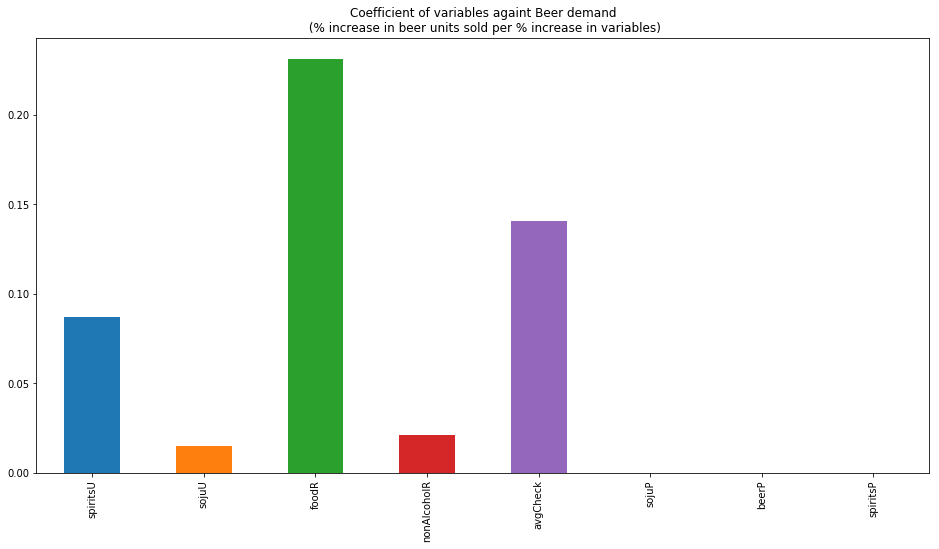

In [73]:
pd.DataFrame(coef, columns = X.columns).describe().loc['mean',:][:8].plot(kind='bar')
plt.title("Coefficient of variables againt Beer demand\n (% increase in beer units sold per % increase in variables)")

- The regression coefficient of Soju Units sold for Beer Units sold is a positive figure.
- I could say that excluding the effect of Bars, dates, 1% increase in Soju Units sold, would lead to 0.015% increase in Beer Units sold.
- It is not a negative figure, and I can say that there is no evidence that demand for Soju would cannibalize demand for Beer.
- It would rather affect positively on sales of Beer, although very insignificant.
- I can say selling more food would rather trigger demand for beer the most.

In [74]:
y = testSet.beerU
X = testSet.iloc[:,4:].drop('beerU', axis=1)

In [75]:
model = RandomForestRegressor(max_depth = 3, random_state = 0, n_estimators=100)

In [76]:
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [77]:
pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False).head(10)

,importance
Bar 71,0.751937
foodR,0.157865
Bar 115,0.074006
Bar 91,0.015377
August,0.000408
sat,0.000282
avgCheck,0.000108
spiritsP,0.000018
spiritsU,0.000000
Bar 107,0.000000


Text(0.5, 1.0, 'feature importances for Beer Units')

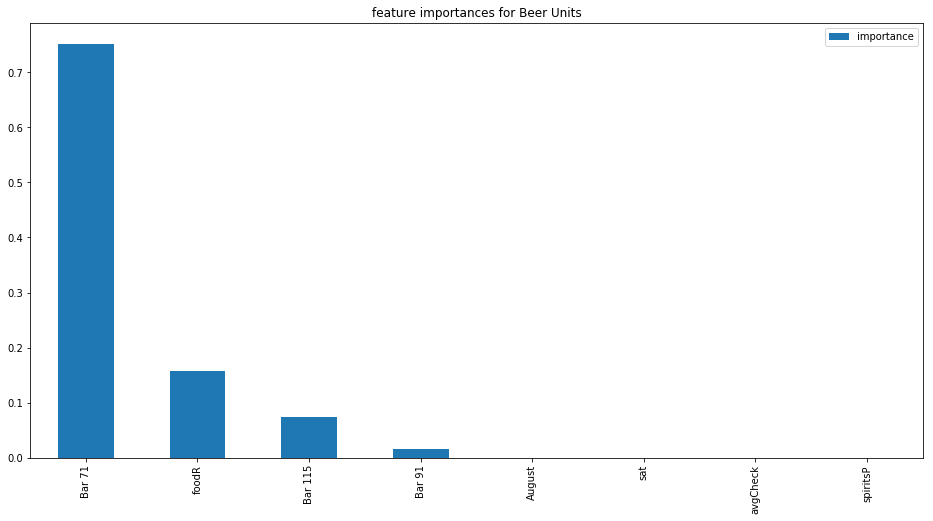

In [78]:
pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False).head(8).plot(kind='bar')
plt.title('feature importances for Beer Units')

- Excluding categorical figures, Food Revenue was the most important feature determining beer units.
- I can assume that the findings from the regression model also pointed out on the relationship between food revenue and beer sales.
- From my domain understanings, **Koreans simply do not drink alcohols without food**, even after a full supper.
- This is evident from Order count data, where given beer orders (298,230), 92.4% ordered food too (275,745).
- So in Korea as a bar operator, I suggest that **it needs to have decent cousine to increase visit rate and increase beer sales**, rather than trying to beat positively correlated soju consumption.

In [79]:
# Run 100 Ridge regression for aggregating for a robust model per month

coef = {}
for m in testSetReg.month.unique():
    coef[m]=[]
    for r in range(100):
        tmp = bootsTrap(testSetReg[testSetReg.month==m], seed=r)
        y = tmp.beerU
        X = tmp.iloc[:,4:].drop('beerU', axis=1)
        model = Ridge(alpha=0.5, normalize=True)
        model.fit(X, y)
        coef[m].append(model.coef_)

Text(0.5, 1.0, 'How coefficient for Soju Units to Beer Units changes over time')

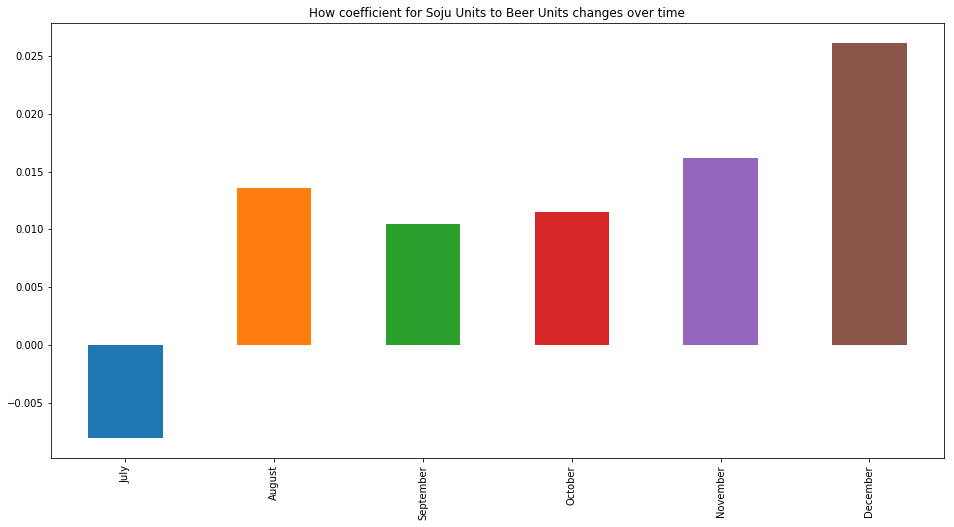

In [80]:
tmp = pd.DataFrame([pd.DataFrame(coef['July'], columns = X.columns).mean(), pd.DataFrame(coef['August'], columns = X.columns).mean(),
              pd.DataFrame(coef['September'], columns = X.columns).mean(), pd.DataFrame(coef['October'], columns = X.columns).mean(),
              pd.DataFrame(coef['November'], columns = X.columns).mean(), pd.DataFrame(coef['December'], columns = X.columns).mean()],
            index = testSetReg.month.unique())
tmp.sojuU.plot(kind='bar')
plt.title('How coefficient for Soju Units to Beer Units changes over time')

- If I were to look into the effect of Soju demand (coefficient) for Beer demand over time, it returns even the opposite explation to the hypothesis "Soju sales are increasing and cannibalizing the beer category".
- In July, the Soju demand was showing traits of a substitute goods for beer, although insignificant.
- As it moves towards December, the Soju demand is showing traits of a complimentary goods for beer, not cannibalizing the demand.
___

## 3. Additional analysis that could provide insight to activate beer category

- As previously looked for, the characterisitcs of bar are diverse, looking at their sales ratio.
- Grouping the bars(kmeans) for above analysis could help us find insights and tailored measures that can increase beer sales.


In [81]:
barChar = testSet.iloc[:,:13].groupby('barId', as_index=False).mean()
barChar.head()

,barId,beerU,spiritsU,sojuU,foodR,nonAlcoholR,avgCheck,sojuP,beerP,spiritsP
0,Bar 1,41.589552,92.395522,44.268657,484983.201493,30758.776119,10.382267,4666.247311,5627.685469,4090.093329
1,Bar 10,63.977778,5.072222,4.772222,129551.111111,4877.777778,10.056194,3577.777778,4403.999339,3746.723338
2,Bar 100,45.414414,6.990991,6.747748,136504.504505,1792.792793,10.207497,3683.360941,3621.979546,3755.433013
3,Bar 101,136.753247,8.051948,0.000000,626676.623377,16649.350649,11.059292,0.000000,8182.564921,6454.462675
4,Bar 102,155.473214,25.589286,14.803571,871169.642857,24633.928571,10.842739,3214.285714,8428.964781,7710.300433


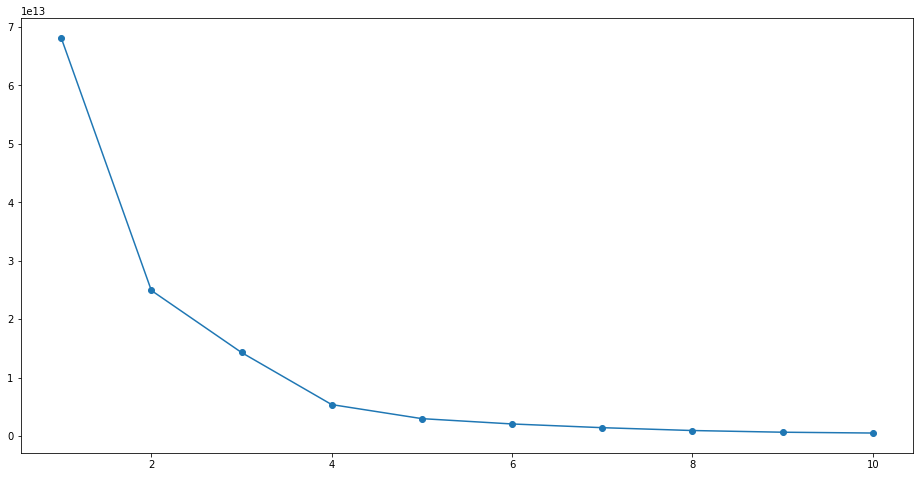

In [82]:
inertias = []

for k in range(10):
    model = KMeans(n_clusters=k+1)
    model.fit(barChar.iloc[:,1:])
    inertias.append(model.inertia_)
    
plt.plot(range(1,11), inertias, '-o')
    

- It seems appropriate to cluster bars in 4 groups.

In [83]:
model = KMeans(n_clusters=4)
model.fit(barChar.iloc[:,1:])
barChar['cluster'] = model.labels_
barChar.head()

,barId,beerU,spiritsU,sojuU,foodR,nonAlcoholR,avgCheck,sojuP,beerP,spiritsP,cluster
0,Bar 1,41.589552,92.395522,44.268657,484983.201493,30758.776119,10.382267,4666.247311,5627.685469,4090.093329,2
1,Bar 10,63.977778,5.072222,4.772222,129551.111111,4877.777778,10.056194,3577.777778,4403.999339,3746.723338,2
2,Bar 100,45.414414,6.990991,6.747748,136504.504505,1792.792793,10.207497,3683.360941,3621.979546,3755.433013,2
3,Bar 101,136.753247,8.051948,0.000000,626676.623377,16649.350649,11.059292,0.000000,8182.564921,6454.462675,0
4,Bar 102,155.473214,25.589286,14.803571,871169.642857,24633.928571,10.842739,3214.285714,8428.964781,7710.300433,0


Text(0.5, 1.0, 'Visualizing clusters in PCA dimention')

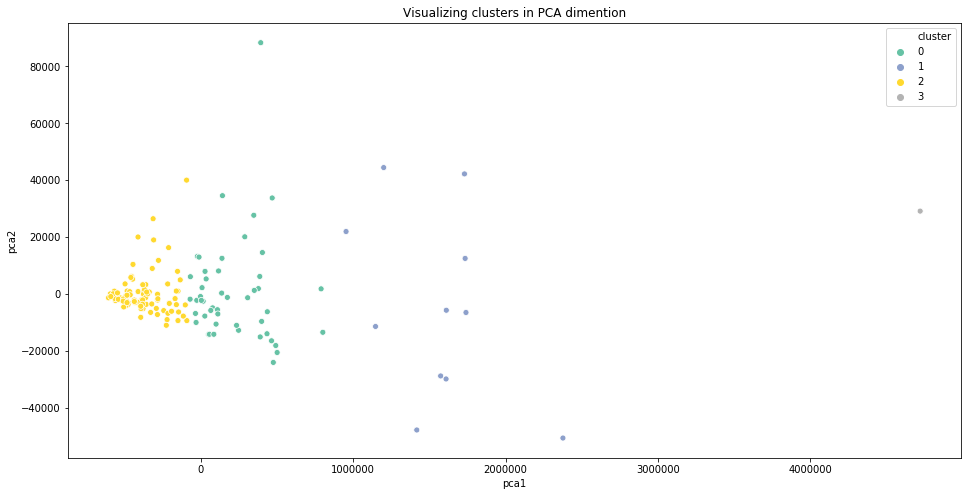

In [84]:
pca = PCA(n_components=2, random_state=0)
tmp = pd.DataFrame(pca.fit_transform(barChar.iloc[:,1:-1]), columns = ['pca1', 'pca2'])
tmp = pd.concat([tmp, barChar.cluster], axis=1)
sns.scatterplot(data=tmp, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("Visualizing clusters in PCA dimention")

In [85]:
barChar.groupby('cluster')['barId'].count()

cluster
0    48
1    11
2    87
3     1
Name: barId, dtype: int64

In [86]:
barChar.groupby('cluster').mean()

,beerU,spiritsU,sojuU,foodR,nonAlcoholR,avgCheck,sojuP,beerP,spiritsP
cluster,,,,,,,,,
0,76.281805,30.125885,19.998225,9.094560e+05,27563.060685,10.400356,3396.873113,4905.164894,4620.448423
1,77.149250,66.569294,19.930486,2.251071e+06,61516.320508,10.415382,2953.841414,4836.123326,4274.398944
2,47.759702,20.665214,16.012125,3.302036e+05,9876.162357,10.434604,3151.426226,4788.232822,4487.582453
3,44.777778,1.185185,0.629630,5.417160e+06,190169.666667,10.872644,1232.360494,6292.697756,1232.360494


- It seems the clusters are well splited, as each cluster demonstrates unique characteristics:
>- cluster0: has 87 bars(the most) in cluster with low sales volume of beer.
>- cluster1: has 11 bars in cluster with fairly high sales volume of everything.
>- cluster2: has 48 bars, and proportion of beer sales is relatively high.
>- cluster3: has only 1 bar, and very low alcohol sales compared to food and nonAlcohol, which I assume to be a normal restaurant
- Now run regression for all four clusters

In [87]:
# Run 100 Ridge regression for aggregating for a robust model per month

coef = {}
for c in range(4):
    coef['cluster{}'.format(c)]=[]
    barId = barChar[barChar.cluster==c].barId.unique()
    for r in range(100):
        tmp = bootsTrap(testSetReg[testSetReg.barId.isin(barId)], seed=r)
        y = tmp.beerU
        X = tmp.iloc[:,4:].drop('beerU', axis=1)
        model = Ridge(alpha=0.5, normalize=True)
        model.fit(X, y)
        coef['cluster{}'.format(c)].append(model.coef_)

In [88]:
tmp = pd.DataFrame([pd.DataFrame(coef['cluster0']).mean(), pd.DataFrame(coef['cluster1']).mean(),
                   pd.DataFrame(coef['cluster2']).mean(), pd.DataFrame(coef['cluster3']).mean()],
                   index = ['cluster{}'.format(i) for i in range(4)])
tmp.columns = X.columns

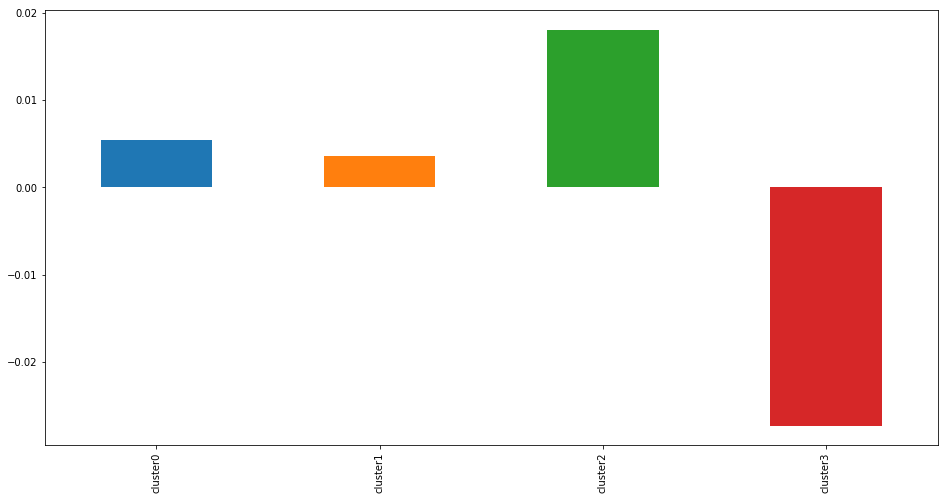

In [89]:
tmp.sojuU.plot(kind='bar')

Text(0.5, 1.0, 'coefficients for variables by clusters')

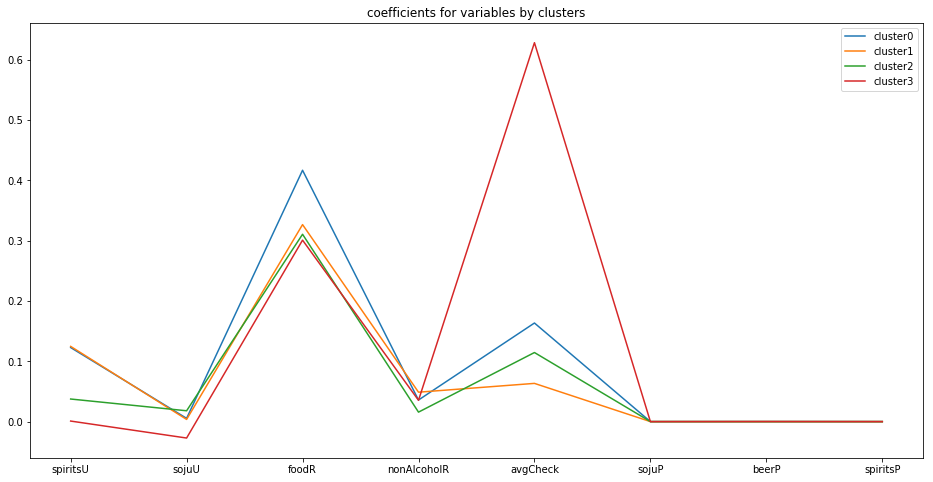

In [90]:
tmp.iloc[:,:8].T.plot()
plt.xticks(range(8), labels = tmp.columns[:8])
plt.title("coefficients for variables by clusters")

In [91]:
barChar.groupby('cluster').mean()

,beerU,spiritsU,sojuU,foodR,nonAlcoholR,avgCheck,sojuP,beerP,spiritsP
cluster,,,,,,,,,
0,76.281805,30.125885,19.998225,9.094560e+05,27563.060685,10.400356,3396.873113,4905.164894,4620.448423
1,77.149250,66.569294,19.930486,2.251071e+06,61516.320508,10.415382,2953.841414,4836.123326,4274.398944
2,47.759702,20.665214,16.012125,3.302036e+05,9876.162357,10.434604,3151.426226,4788.232822,4487.582453
3,44.777778,1.185185,0.629630,5.417160e+06,190169.666667,10.872644,1232.360494,6292.697756,1232.360494


- 

In [92]:
tmp = bootsTrap(testSetReg, seed=1)
y = tmp.beerU
X = tmp.iloc[:,4:].drop('beerU', axis=1)
model = Ridge(alpha=0.5, normalize=True)
model.fit(X, y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [98]:
model.tol


0.001

In [101]:
data.totalR/data.avgCheck

0         33.0
1         16.0
2         22.0
3         16.0
4          9.0
5         26.0
6         44.0
7         28.0
8         15.0
9         11.0
10        30.0
11        37.0
12        31.0
13         9.0
14         5.0
15        18.0
16        16.0
17        25.0
18        28.0
19        18.0
20        13.0
21         8.0
22        11.0
23        15.0
24        22.0
25        50.0
26        26.0
27        17.0
28        10.0
29        17.0
         ...  
16605     88.0
16606     92.0
16607     82.0
16608     59.0
16609     40.0
16610     44.0
16611     70.0
16612     77.0
16613     67.0
16614     53.0
16615     56.0
16616     54.0
16617     58.0
16618     69.0
16619     63.0
16620     60.0
16621     60.0
16622    138.0
16623    102.0
16624     46.0
16625     88.0
16626     81.0
16627    124.0
16628     71.0
16629     52.0
16630     63.0
16631     61.0
16632     85.0
16633     83.0
16634    143.0
Length: 16635, dtype: float64